In [117]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
#Pre-Test
import requests

pokemon = "pikachu"
url = f"https://pokeapi.co/api/v2/pokemon/{pokemon}"
response = requests.get(url).json()




print("Name:", response["name"])
print("Type:", response["types"][0]["type"]["name"])
print("Abilities:", [ability["ability"]["name"] for ability in response["abilities"]])
print(f"{pokemon.capitalize()} is No.{response['id']} in the Pokédex.")
print(f"Base stats for {pokemon.capitalize()}:")


for stat in response["stats"]:
    stat_name = stat["stat"]["name"]
    base_value = stat["base_stat"]
    print(f"{stat_name.capitalize()}: {base_value}")
hp_stat = next(stat["base_stat"] for stat in response["stats"] if stat["stat"]["name"] == "hp")


Name: pikachu
Type: electric
Abilities: ['static', 'lightning-rod']
Pikachu is No.25 in the Pokédex.
Base stats for Pikachu:
Hp: 35
Attack: 55
Defense: 40
Special-attack: 50
Special-defense: 50
Speed: 90


In [119]:
#Data for Gen 1

pokemon_data = []

for i in range(1,152):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

# Convert to DataFrame
multi_pokemon_df = pd.DataFrame(pokemon_data)
print(multi_pokemon_df.head())

         Name   Type                Abilities  id  HP  Attack  Defense  Speed  \
0   bulbasaur  grass  [overgrow, chlorophyll]   1  45      49       49     45   
1     ivysaur  grass  [overgrow, chlorophyll]   2  60      62       63     60   
2    venusaur  grass  [overgrow, chlorophyll]   3  80      82       83     80   
3  charmander   fire     [blaze, solar-power]   4  39      52       43     65   
4  charmeleon   fire     [blaze, solar-power]   5  58      64       58     80   

   Special Attack  Special Defense  Total Stats  
0              65               65          318  
1              80               80          405  
2             100              100          525  
3              60               50          309  
4              80               65          405  


In [120]:
#Calulate average stats by type
average_stats_by_type = multi_pokemon_df.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type)

                 HP      Attack     Defense       Speed  Special Attack  \
Type                                                                      
bug       55.416667   63.750000   57.083333   57.083333       47.500000   
dragon    64.333333   94.000000   68.333333   66.666667       73.333333   
electric  54.444444   62.000000   64.666667  100.000000       91.111111   
fairy     82.500000   57.500000   60.500000   47.500000       77.500000   
fighting  63.571429  102.857143   61.000000   66.142857       45.000000   
fire      63.833333   83.916667   62.583333   84.000000       84.583333   
ghost     45.000000   50.000000   45.000000   95.000000      115.000000   
grass     65.000000   70.666667   69.583333   52.083333       87.916667   
ground    58.125000   84.375000   86.250000   58.125000       39.375000   
ice       77.500000   67.500000   67.500000   90.000000      105.000000   
normal    78.681818   68.863636   53.545455   69.772727       51.272727   
poison    64.500000   75.

In [11]:
# Display the shape of the DataFrame
average_stats_by_type.shape 

(15, 7)

In [12]:
average_stats_by_type.head()

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,55.416667,63.750000,57.083333,57.083333,47.500000,55.416667,336.250000
dragon,64.333333,94.000000,68.333333,66.666667,73.333333,73.333333,440.000000
electric,54.444444,62.000000,64.666667,100.000000,91.111111,73.333333,445.555556
fairy,82.500000,57.500000,60.500000,47.500000,77.500000,77.500000,403.000000
fighting,63.571429,102.857143,61.000000,66.142857,45.000000,73.571429,412.142857


In [13]:
# Type is not a column
average_stats_by_type.columns

Index(['HP', 'Attack', 'Defense', 'Speed', 'Special Attack', 'Special Defense',
       'Total Stats'],
      dtype='object')

In [14]:
multi_pokemon_df.shape 

(151, 11)

In [15]:
multi_pokemon_df.head()

,Name,Type,Abilities,id,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
0,bulbasaur,grass,"[overgrow, chlorophyll]",1,45,49,49,45,65,65,318
1,ivysaur,grass,"[overgrow, chlorophyll]",2,60,62,63,60,80,80,405
2,venusaur,grass,"[overgrow, chlorophyll]",3,80,82,83,80,100,100,525
3,charmander,fire,"[blaze, solar-power]",4,39,52,43,65,60,50,309
4,charmeleon,fire,"[blaze, solar-power]",5,58,64,58,80,80,65,405


- After we call groupby, we replace the labels in the original dataset (e.g., 0, 1, 2, 3 etc) with new labels (e.g., bug, dragon etc), hence we need to call `Dataframe.index` to access the label information. 

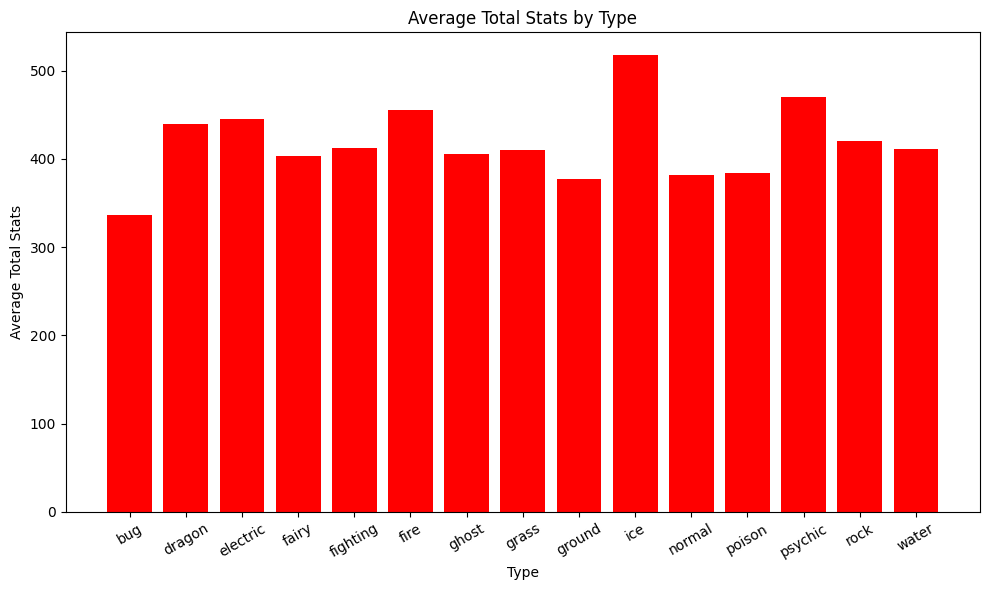

In [16]:
#Draw a bar chart of average total stats by type
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type.index, average_stats_by_type["Total Stats"], color = 'red') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [123]:
pokemon_data2 = []

for i in range(152,252):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data2.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df2 = pd.DataFrame(pokemon_data2)
print(multi_pokemon_df2.head())

        Name   Type               Abilities   id  HP  Attack  Defense  Speed  \
0  chikorita  grass  [overgrow, leaf-guard]  152  45      49       65     45   
1    bayleef  grass  [overgrow, leaf-guard]  153  60      62       80     60   
2   meganium  grass  [overgrow, leaf-guard]  154  80      82      100     80   
3  cyndaquil   fire     [blaze, flash-fire]  155  39      52       43     65   
4    quilava   fire     [blaze, flash-fire]  156  58      64       58     80   

   Special Attack  Special Defense  Total Stats  
0              49               65          318  
1              63               80          405  
2              83              100          525  
3              60               50          309  
4              80               65          405  


In [124]:
average_stats_by_type2 = multi_pokemon_df2.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type2)

average_stats_by_type2.shape

average_stats_by_type2.head()

                 HP     Attack     Defense       Speed  Special Attack  \
Type                                                                     
bug       56.500000  69.000000   87.000000   51.500000       47.000000   
dark      66.000000  79.000000   57.400000   86.200000       74.000000   
electric  61.666667  59.666667   51.166667   67.500000       79.166667   
fairy     58.000000  57.000000   60.600000   30.000000       53.000000   
fighting  42.500000  65.000000   65.000000   52.500000       35.000000   
fire      67.625000  76.250000   68.875000   71.000000       84.875000   
ghost     60.000000  60.000000   60.000000   85.000000       85.000000   
grass     58.888889  57.000000   65.000000   59.444444       61.666667   
ground    81.666667  85.000000   95.000000   58.333333       45.000000   
ice       60.000000  58.750000   45.000000   60.000000       60.000000   
normal    87.200000  63.133333   54.000000   62.000000       59.133333   
poison    85.000000  90.000000   80.00

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,56.500000,69.000000,87.000000,51.5,47.000000,84.500000,395.500000
dark,66.000000,79.000000,57.400000,86.2,74.000000,75.400000,438.000000
electric,61.666667,59.666667,51.166667,67.5,79.166667,64.166667,383.333333
fairy,58.000000,57.000000,60.600000,30.0,53.000000,65.000000,323.600000
fighting,42.500000,65.000000,65.000000,52.5,35.000000,72.500000,332.500000


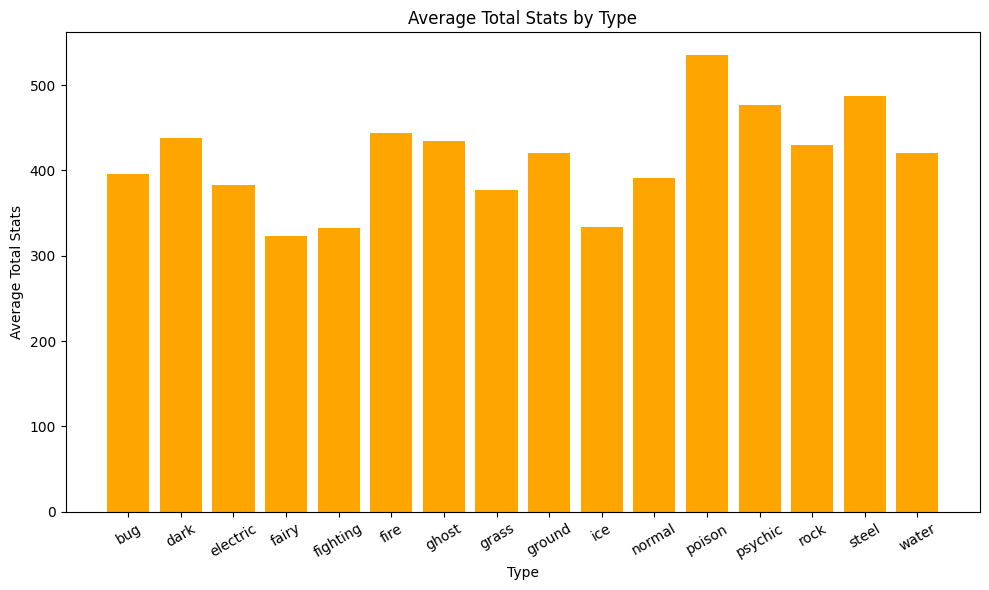

In [125]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type2.index, average_stats_by_type2["Total Stats"], color = 'orange') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [126]:
pokemon_data3 = []

for i in range(252,387):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data3.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df3 = pd.DataFrame(pokemon_data3)
print(multi_pokemon_df3.head())

        Name   Type             Abilities   id  HP  Attack  Defense  Speed  \
0    treecko  grass  [overgrow, unburden]  252  40      45       35     70   
1    grovyle  grass  [overgrow, unburden]  253  50      65       45     95   
2   sceptile  grass  [overgrow, unburden]  254  70      85       65    120   
3    torchic   fire  [blaze, speed-boost]  255  45      60       40     45   
4  combusken   fire  [blaze, speed-boost]  256  60      85       60     55   

   Special Attack  Special Defense  Total Stats  
0              65               55          310  
1              85               65          405  
2             105               85          530  
3              70               50          310  
4              85               60          405  


In [127]:
average_stats_by_type3 = multi_pokemon_df3.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type3)

average_stats_by_type3.shape

average_stats_by_type3.head()

                 HP     Attack     Defense      Speed  Special Attack  \
Type                                                                    
bug       49.833333  55.833333   57.416667  61.250000       50.000000   
dark      55.000000  87.500000   60.000000  57.500000       57.500000   
dragon    77.857143  99.285714   84.285714  85.000000       95.714286   
electric  57.500000  52.500000   47.500000  90.000000       82.500000   
fighting  76.500000  70.000000   55.000000  53.750000       40.000000   
fire      64.166667  85.000000   70.000000  45.833333       86.666667   
ghost     42.000000  75.000000   80.000000  40.000000       59.000000   
grass     62.416667  75.250000   55.250000  63.833333       75.583333   
ground    62.500000  88.333333   79.166667  66.666667       64.166667   
ice       80.000000  60.000000   73.333333  52.500000       75.833333   
normal    68.666667  69.888889   57.277778  66.888889       54.611111   
poison    81.000000  72.000000   65.333333  53.3333

                 HP     Attack     Defense      Speed  Special Attack  \
Type                                                                    
bug       49.833333  55.833333   57.416667  61.250000       50.000000   
dark      55.000000  87.500000   60.000000  57.500000       57.500000   
dragon    77.857143  99.285714   84.285714  85.000000       95.714286   
electric  57.500000  52.500000   47.500000  90.000000       82.500000   
fighting  76.500000  70.000000   55.000000  53.750000       40.000000   
fire      64.166667  85.000000   70.000000  45.833333       86.666667   
ghost     42.000000  75.000000   80.000000  40.000000       59.000000   
grass     62.416667  75.250000   55.250000  63.833333       75.583333   
ground    62.500000  88.333333   79.166667  66.666667       64.166667   
ice       80.000000  60.000000   73.333333  52.500000       75.833333   
normal    68.666667  69.888889   57.277778  66.888889       54.611111   
poison    81.000000  72.000000   65.333333  53.3333

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,49.833333,55.833333,57.416667,61.25,50.000000,52.833333,327.166667
dark,55.000000,87.500000,60.000000,57.50,57.500000,53.750000,371.250000
dragon,77.857143,99.285714,84.285714,85.00,95.714286,85.000000,527.142857
electric,57.500000,52.500000,47.500000,90.00,82.500000,65.000000,395.000000
fighting,76.500000,70.000000,55.000000,53.75,40.000000,55.000000,350.250000


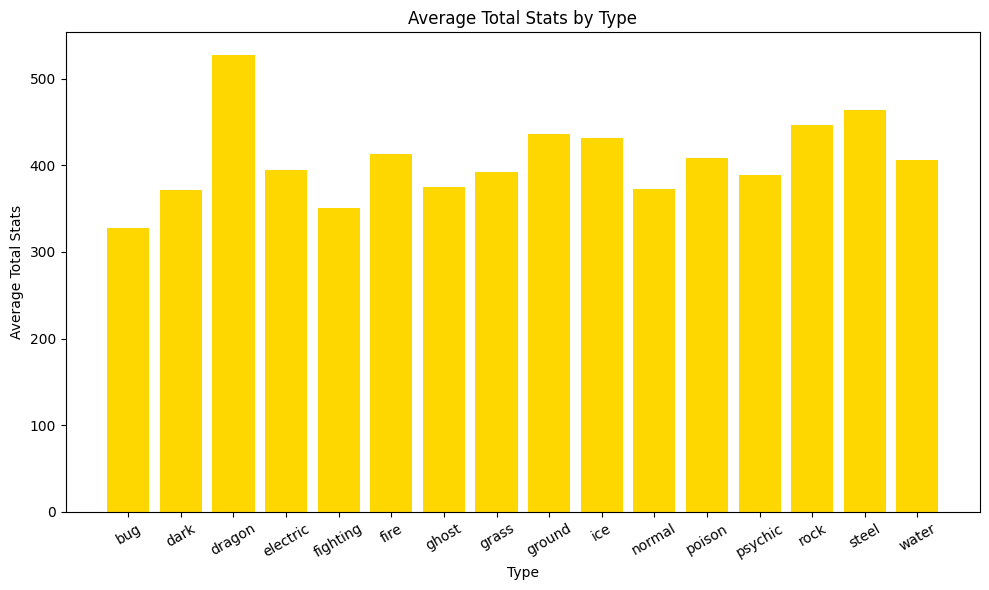

In [128]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type3.index, average_stats_by_type3["Total Stats"], color = 'gold') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [129]:
pokemon_data4 = []

for i in range(387,494):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data4.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df4 = pd.DataFrame(pokemon_data4)
print(multi_pokemon_df4.head())

       Name   Type                Abilities   id  HP  Attack  Defense  Speed  \
0   turtwig  grass  [overgrow, shell-armor]  387  55      68       64     31   
1    grotle  grass  [overgrow, shell-armor]  388  75      89       85     36   
2  torterra  grass  [overgrow, shell-armor]  389  95     109      105     56   
3  chimchar   fire       [blaze, iron-fist]  390  44      58       44     61   
4  monferno   fire       [blaze, iron-fist]  391  64      78       52     81   

   Special Attack  Special Defense  Total Stats  
0              45               55          318  
1              55               65          405  
2              75               85          525  
3              58               44          309  
4              78               52          405  


In [130]:
average_stats_by_type4 = multi_pokemon_df4.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type4)

average_stats_by_type4.shape

average_stats_by_type4.head()

                 HP      Attack     Defense       Speed  Special Attack  \
Type                                                                      
bug       58.750000   59.750000   62.750000   54.125000       63.500000   
dark      80.000000  111.666667   69.000000  107.000000       95.000000   
dragon    78.000000   96.666667   68.333333   75.333333       56.666667   
electric  62.857143   79.714286   70.142857   73.714286       80.000000   
fairy     85.000000   50.000000   95.000000   80.000000      120.000000   
fighting  55.000000   90.000000   55.000000   75.000000       75.000000   
fire      70.000000   85.000000   68.000000   82.000000       99.000000   
ghost     90.833333   80.333333   83.500000   70.833333       85.333333   
grass     71.461538   78.846154   78.538462   59.923077       77.923077   
ground    91.500000  104.750000  112.750000   53.500000       51.500000   
ice       81.666667   90.000000   86.666667   85.000000       93.333333   
normal    80.529412   79.

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,58.750000,59.750000,62.750000,54.125000,63.500000,61.500000,360.375000
dark,80.000000,111.666667,69.000000,107.000000,95.000000,75.666667,538.333333
dragon,78.000000,96.666667,68.333333,75.333333,56.666667,61.666667,436.666667
electric,62.857143,79.714286,70.142857,73.714286,80.000000,72.000000,438.428571
fairy,85.000000,50.000000,95.000000,80.000000,120.000000,115.000000,545.000000


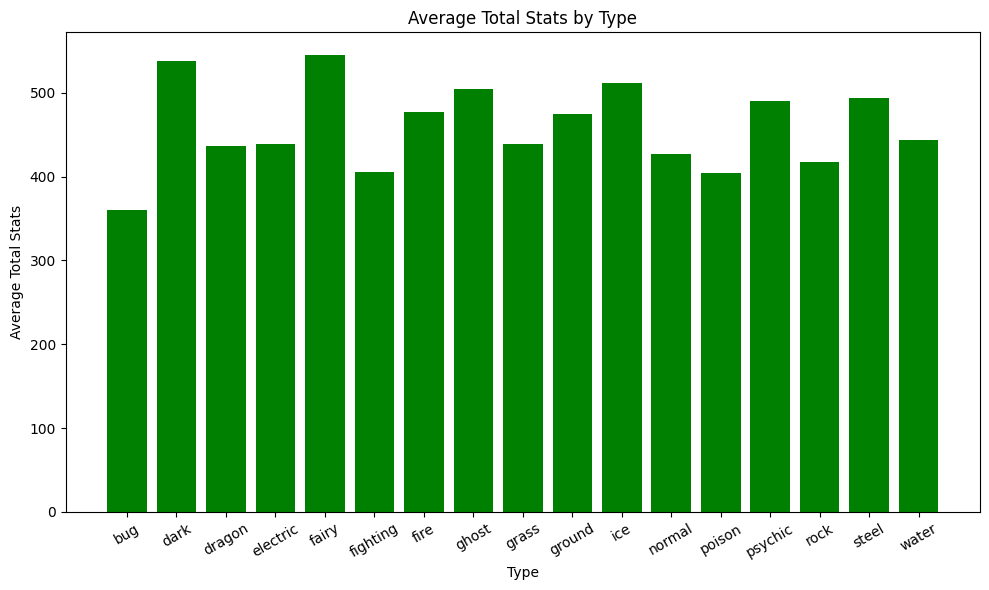

In [131]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type4.index, average_stats_by_type4["Total Stats"], color = 'green') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [132]:
pokemon_data5 = []

for i in range(494,650):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data5.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df5 = pd.DataFrame(pokemon_data5)
print(multi_pokemon_df5.head())

        Name     Type             Abilities   id   HP  Attack  Defense  Speed  \
0    victini  psychic        [victory-star]  494  100     100      100    100   
1      snivy    grass  [overgrow, contrary]  495   45      45       55     63   
2    servine    grass  [overgrow, contrary]  496   60      60       75     83   
3  serperior    grass  [overgrow, contrary]  497   75      75       95    113   
4      tepig     fire    [blaze, thick-fat]  498   65      63       45     45   

   Special Attack  Special Defense  Total Stats  
0             100              100          600  
1              45               55          308  
2              60               75          413  
3              75               95          528  
4              45               45          308  


In [133]:
average_stats_by_type5 = multi_pokemon_df5.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type5)

average_stats_by_type5.shape

average_stats_by_type5.head()

                 HP      Attack     Defense       Speed  Special Attack  \
Type                                                                      
bug       59.111111   78.166667   78.277778   71.277778       62.888889   
dark      63.538462   81.384615   71.692308   70.153846       65.615385   
dragon    84.285714  124.428571   88.571429   77.714286       84.285714   
electric  62.714286   86.428571   59.285714   79.428571       79.285714   
fighting  81.428571  108.571429   72.142857   60.000000       47.142857   
fire      81.250000   94.625000   55.250000   67.500000       64.500000   
flying    79.000000  115.000000   70.000000  111.000000      125.000000   
ghost     53.200000   41.000000   87.000000   43.000000       91.000000   
grass     65.800000   65.333333   72.133333   64.600000       69.266667   
ground    80.111111   97.777778   62.666667   67.777778       56.777778   
ice       64.666667   76.666667   61.666667   62.833333       80.000000   
normal    72.352941   82.

                 HP      Attack     Defense       Speed  Special Attack  \
Type                                                                      
bug       59.111111   78.166667   78.277778   71.277778       62.888889   
dark      63.538462   81.384615   71.692308   70.153846       65.615385   
dragon    84.285714  124.428571   88.571429   77.714286       84.285714   
electric  62.714286   86.428571   59.285714   79.428571       79.285714   
fighting  81.428571  108.571429   72.142857   60.000000       47.142857   
fire      81.250000   94.625000   55.250000   67.500000       64.500000   
flying    79.000000  115.000000   70.000000  111.000000      125.000000   
ghost     53.200000   41.000000   87.000000   43.000000       91.000000   
grass     65.800000   65.333333   72.133333   64.600000       69.266667   
ground    80.111111   97.777778   62.666667   67.777778       56.777778   
ice       64.666667   76.666667   61.666667   62.833333       80.000000   
normal    72.352941   82.

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,59.111111,78.166667,78.277778,71.277778,62.888889,66.944444,416.666667
dark,63.538462,81.384615,71.692308,70.153846,65.615385,65.538462,417.923077
dragon,84.285714,124.428571,88.571429,77.714286,84.285714,80.000000,539.285714
electric,62.714286,86.428571,59.285714,79.428571,79.285714,60.714286,427.857143
fighting,81.428571,108.571429,72.142857,60.000000,47.142857,60.000000,429.285714


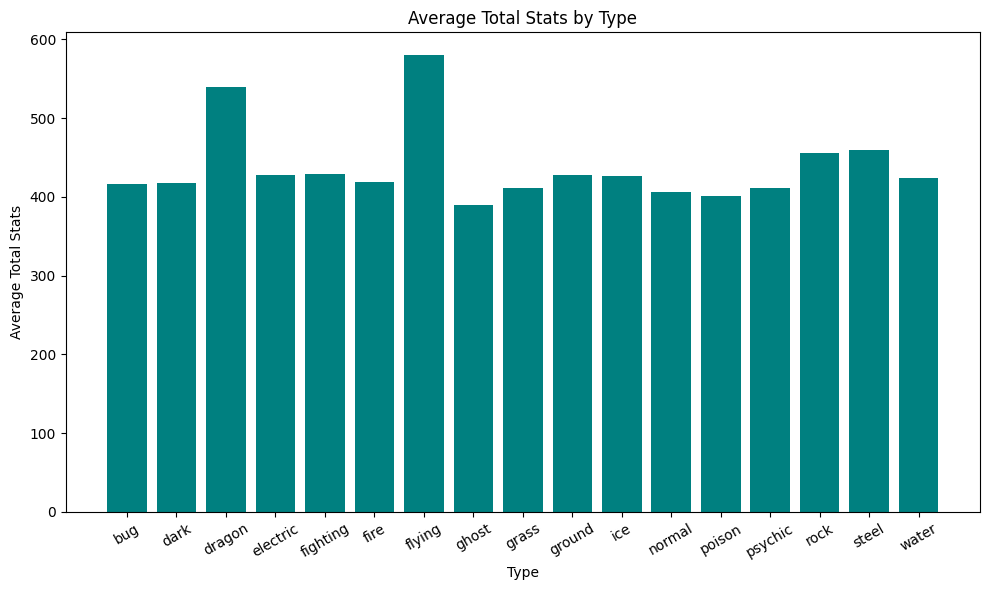

In [134]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type5.index, average_stats_by_type5["Total Stats"], color = 'teal') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [135]:
pokemon_data6 = []

for i in range(650,722):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data6.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df6 = pd.DataFrame(pokemon_data6)
print(multi_pokemon_df6.head())

         Name   Type                Abilities   id  HP  Attack  Defense  \
0     chespin  grass  [overgrow, bulletproof]  650  56      61       65   
1   quilladin  grass  [overgrow, bulletproof]  651  61      78       95   
2  chesnaught  grass  [overgrow, bulletproof]  652  88     107      122   
3    fennekin   fire        [blaze, magician]  653  40      45       40   
4     braixen   fire        [blaze, magician]  654  59      59       58   

   Speed  Special Attack  Special Defense  Total Stats  
0     38              48               45          313  
1     57              56               58          405  
2     64              74               75          530  
3     60              62               60          307  
4     73              90               70          409  


In [136]:
average_stats_by_type6 = multi_pokemon_df6.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type6)

average_stats_by_type6.shape

average_stats_by_type6.head()

                 HP     Attack     Defense      Speed  Special Attack  \
Type                                                                    
bug       54.333333  36.333333   50.000000  51.000000       48.000000   
dark      88.333333  92.333333   78.666667  72.333333       78.666667   
dragon    77.750000  81.250000   69.750000  68.750000       82.250000   
electric  57.666667  50.333333   47.333333  93.333333       83.666667   
fairy     80.000000  66.222222   66.444444  55.666667       88.333333   
fighting  80.000000  99.333333   71.666667  73.000000       63.000000   
fire      67.750000  69.375000   68.250000  86.875000       88.500000   
flying    62.500000  50.000000   57.500000  89.000000       71.000000   
ghost     60.500000  84.000000   79.000000  57.250000       54.250000   
grass     78.800000  82.200000   78.400000  55.800000       67.400000   
ice       75.000000  93.000000  134.500000  28.000000       38.000000   
normal    60.750000  55.500000   54.500000  74.7500

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,54.333333,36.333333,50.000000,51.000000,48.000000,35.000000,274.666667
dark,88.333333,92.333333,78.666667,72.333333,78.666667,73.000000,483.333333
dragon,77.750000,81.250000,69.750000,68.750000,82.250000,108.250000,488.000000
electric,57.666667,50.333333,47.333333,93.333333,83.666667,68.000000,400.333333
fairy,80.000000,66.222222,66.444444,55.666667,88.333333,93.888889,450.555556


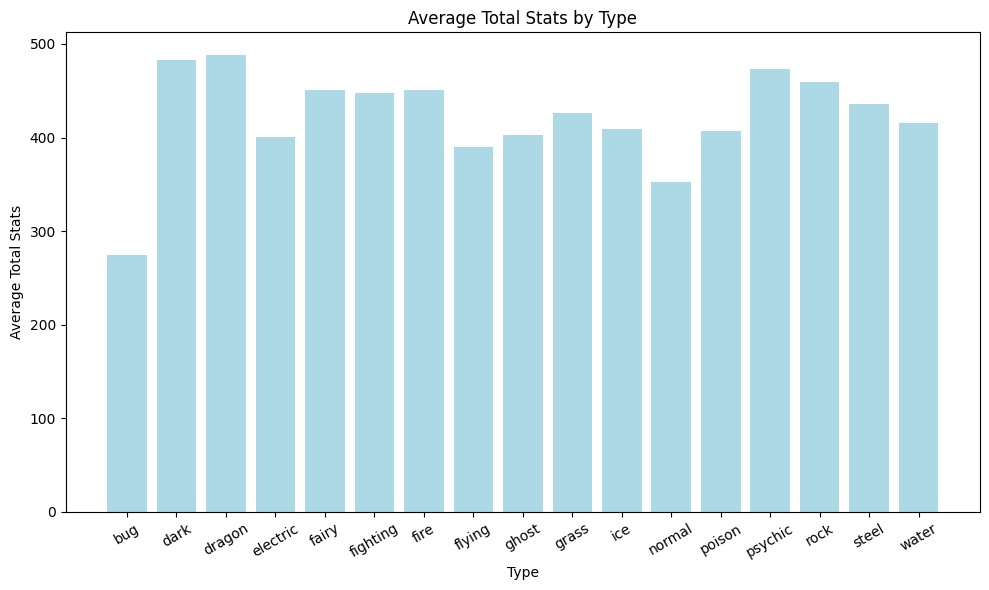

In [137]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type6.index, average_stats_by_type6["Total Stats"], color = 'lightblue') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [138]:
pokemon_data7 = []

for i in range(722,810):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data7.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df7 = pd.DataFrame(pokemon_data7)
print(multi_pokemon_df7.head())

        Name   Type               Abilities   id  HP  Attack  Defense  Speed  \
0     rowlet  grass  [overgrow, long-reach]  722  68      55       55     42   
1    dartrix  grass  [overgrow, long-reach]  723  78      75       75     52   
2  decidueye  grass  [overgrow, long-reach]  724  78     107       75     70   
3     litten   fire     [blaze, intimidate]  725  45      65       40     70   
4   torracat   fire     [blaze, intimidate]  726  65      85       50     90   

   Special Attack  Special Defense  Total Stats  
0              50               50          320  
1              70               70          420  
2             100              100          530  
3              60               40          320  
4              80               50          420  


In [139]:
average_stats_by_type7 = multi_pokemon_df7.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type7)

average_stats_by_type7.shape

average_stats_by_type7.head()

                  HP      Attack     Defense       Speed  Special Attack  \
Type                                                                       
bug        62.111111   83.333333   76.222222   75.888889       75.000000   
dark      223.000000  101.000000   53.000000   43.000000       97.000000   
dragon     58.333333   80.000000   93.333333   65.000000       70.000000   
electric   76.500000  103.500000   73.500000  113.000000      102.500000   
fairy      51.000000   52.000000   90.000000  100.000000       82.000000   
fighting   83.500000  114.750000   76.000000   77.750000       58.500000   
fire       65.500000   90.000000   73.000000   76.000000       93.333333   
ghost      66.250000   87.750000   92.500000   46.500000       76.500000   
grass      60.750000   81.500000   74.583333   53.250000       64.083333   
ground     85.000000  112.500000   85.000000   40.000000       50.000000   
normal     76.583333   90.416667   66.250000   59.583333       68.333333   
poison     5

                  HP      Attack     Defense       Speed  Special Attack  \
Type                                                                       
bug        62.111111   83.333333   76.222222   75.888889       75.000000   
dark      223.000000  101.000000   53.000000   43.000000       97.000000   
dragon     58.333333   80.000000   93.333333   65.000000       70.000000   
electric   76.500000  103.500000   73.500000  113.000000      102.500000   
fairy      51.000000   52.000000   90.000000  100.000000       82.000000   
fighting   83.500000  114.750000   76.000000   77.750000       58.500000   
fire       65.500000   90.000000   73.000000   76.000000       93.333333   
ghost      66.250000   87.750000   92.500000   46.500000       76.500000   
grass      60.750000   81.500000   74.583333   53.250000       64.083333   
ground     85.000000  112.500000   85.000000   40.000000       50.000000   
normal     76.583333   90.416667   66.250000   59.583333       68.333333   
poison     5

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,62.111111,83.333333,76.222222,75.888889,75.0,57.222222,429.777778
dark,223.000000,101.000000,53.000000,43.000000,97.0,53.000000,570.000000
dragon,58.333333,80.000000,93.333333,65.000000,70.0,73.333333,440.000000
electric,76.500000,103.500000,73.500000,113.000000,102.5,74.750000,543.750000
fairy,51.000000,52.000000,90.000000,100.000000,82.0,110.000000,485.000000


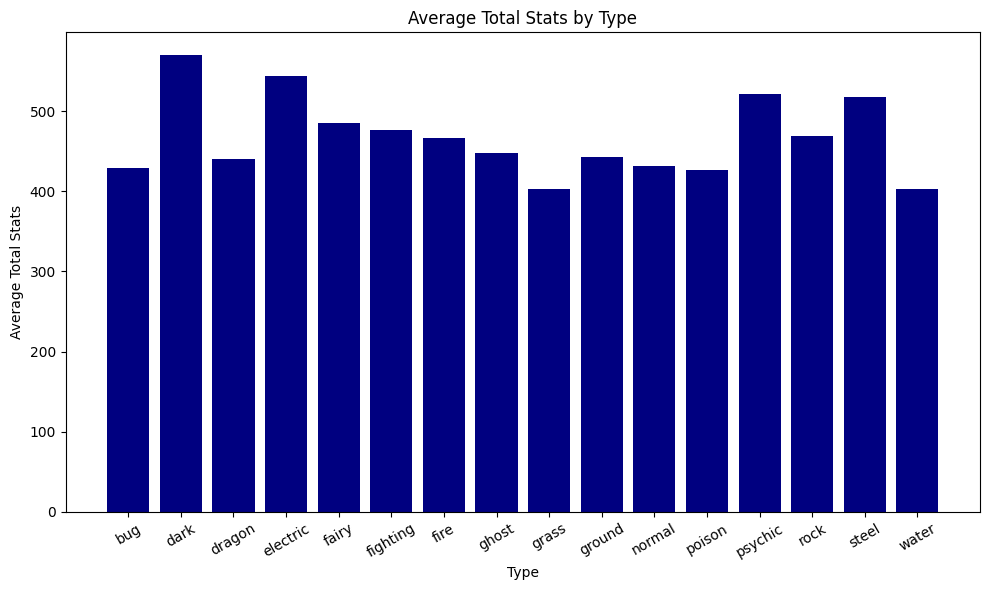

In [140]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type7.index, average_stats_by_type7["Total Stats"], color = 'navy') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [141]:
pokemon_data8 = []

for i in range(810,906):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data8.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df8 = pd.DataFrame(pokemon_data8)
print(multi_pokemon_df8.head())

        Name   Type                 Abilities   id   HP  Attack  Defense  \
0    grookey  grass  [overgrow, grassy-surge]  810   50      65       50   
1   thwackey  grass  [overgrow, grassy-surge]  811   70      85       70   
2  rillaboom  grass  [overgrow, grassy-surge]  812  100     125       90   
3  scorbunny   fire           [blaze, libero]  813   50      71       40   
4     raboot   fire           [blaze, libero]  814   65      86       60   

   Speed  Special Attack  Special Defense  Total Stats  
0     65              40               40          310  
1     80              55               60          420  
2     85              60               70          530  
3     69              40               40          310  
4     94              55               60          420  


In [142]:
average_stats_by_type8 = multi_pokemon_df8.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type8)

average_stats_by_type8.shape

average_stats_by_type8.head()

                  HP      Attack     Defense       Speed  Special Attack  \
Type                                                                       
bug        51.250000   58.750000   76.250000   62.500000           50.00   
dark       74.750000   79.500000   65.875000   75.625000           69.25   
dragon     96.000000   90.000000   51.250000  101.500000           75.00   
electric   67.666667   85.222222   66.444444   78.222222           81.00   
fairy      69.000000   83.750000   75.000000   85.500000           93.75   
fighting   73.625000  111.375000   85.000000   80.125000           61.75   
fire       69.000000   90.600000   57.000000   78.400000           60.00   
flying     68.500000   71.500000   62.500000   71.500000           53.50   
ghost      65.000000   67.500000   55.000000   70.000000          124.50   
grass      67.500000   75.000000   75.000000   52.500000           63.75   
ground     78.000000   99.750000  112.500000   49.250000           48.75   
ice        7

                  HP      Attack     Defense       Speed  Special Attack  \
Type                                                                       
bug        51.250000   58.750000   76.250000   62.500000           50.00   
dark       74.750000   79.500000   65.875000   75.625000           69.25   
dragon     96.000000   90.000000   51.250000  101.500000           75.00   
electric   67.666667   85.222222   66.444444   78.222222           81.00   
fairy      69.000000   83.750000   75.000000   85.500000           93.75   
fighting   73.625000  111.375000   85.000000   80.125000           61.75   
fire       69.000000   90.600000   57.000000   78.400000           60.00   
flying     68.500000   71.500000   62.500000   71.500000           53.50   
ghost      65.000000   67.500000   55.000000   70.000000          124.50   
grass      67.500000   75.000000   75.000000   52.500000           63.75   
ground     78.000000   99.750000  112.500000   49.250000           48.75   
ice        7

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,51.250000,58.750000,76.250000,62.500000,50.00,81.250,380.000000
dark,74.750000,79.500000,65.875000,75.625000,69.25,69.375,434.375000
dragon,96.000000,90.000000,51.250000,101.500000,75.00,51.250,465.000000
electric,67.666667,85.222222,66.444444,78.222222,81.00,62.000,440.555556
fairy,69.000000,83.750000,75.000000,85.500000,93.75,94.250,501.250000


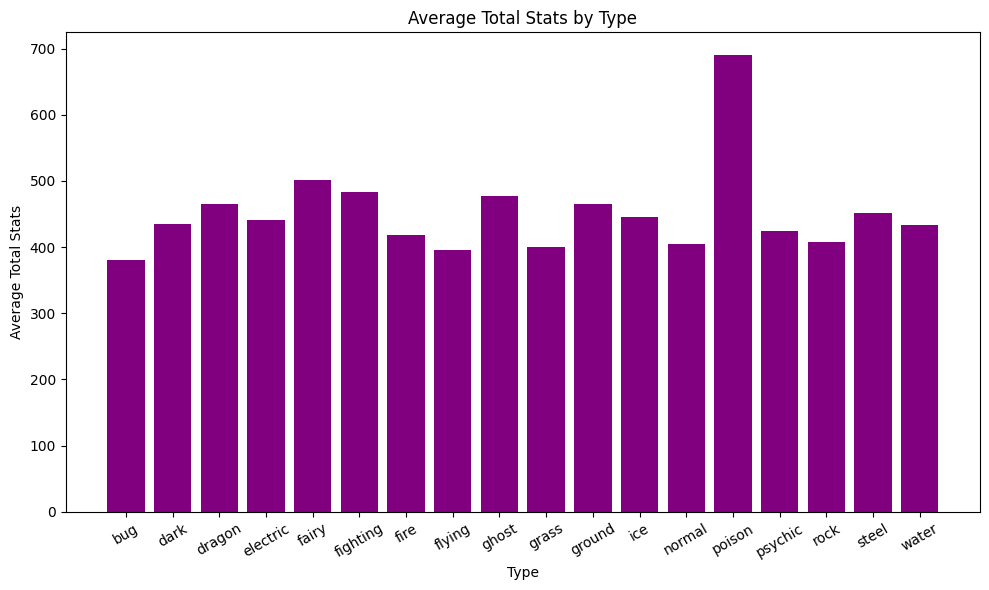

In [38]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type8.index, average_stats_by_type8["Total Stats"], color = 'purple') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

In [143]:
pokemon_data9 = []

for i in range(906,1026):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data9.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df9 = pd.DataFrame(pokemon_data9)
print(multi_pokemon_df9.head())

          Name   Type            Abilities   id  HP  Attack  Defense  Speed  \
0   sprigatito  grass  [overgrow, protean]  906  40      61       54     65   
1    floragato  grass  [overgrow, protean]  907  61      80       63     83   
2  meowscarada  grass  [overgrow, protean]  908  76     110       70    123   
3      fuecoco   fire     [blaze, unaware]  909  67      45       59     36   
4     crocalor   fire     [blaze, unaware]  910  81      55       78     49   

   Special Attack  Special Defense  Total Stats  
0              45               45          310  
1              60               63          410  
2              81               70          530  
3              63               40          310  
4              90               58          411  


In [144]:
average_stats_by_type9 = multi_pokemon_df9.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()
print(average_stats_by_type9)

average_stats_by_type9.shape

average_stats_by_type9.head()

                  HP      Attack     Defense      Speed  Special Attack  \
Type                                                                      
bug        57.142857   71.857143   68.428571  49.714286       55.000000   
dark       88.625000  101.000000   92.625000  80.500000       82.125000   
dragon     85.500000   99.833333   66.500000  87.666667       69.166667   
electric   76.500000   68.400000   64.500000  84.600000       87.500000   
fairy      69.000000   72.142857   78.714286  88.142857       59.285714   
fighting  121.333333  130.000000  101.000000  91.666667       61.666667   
fire       79.625000   74.375000   79.750000  68.375000       87.875000   
flying     76.000000  109.000000   79.500000  86.000000       67.500000   
ghost      55.500000   61.750000   71.250000  61.750000       72.500000   
grass      66.823529   82.352941   72.294118  65.941176       80.058824   
ground     81.250000   88.250000   87.750000  90.750000       63.750000   
ice       111.333333   87

                  HP      Attack     Defense      Speed  Special Attack  \
Type                                                                      
bug        57.142857   71.857143   68.428571  49.714286       55.000000   
dark       88.625000  101.000000   92.625000  80.500000       82.125000   
dragon     85.500000   99.833333   66.500000  87.666667       69.166667   
electric   76.500000   68.400000   64.500000  84.600000       87.500000   
fairy      69.000000   72.142857   78.714286  88.142857       59.285714   
fighting  121.333333  130.000000  101.000000  91.666667       61.666667   
fire       79.625000   74.375000   79.750000  68.375000       87.875000   
flying     76.000000  109.000000   79.500000  86.000000       67.500000   
ghost      55.500000   61.750000   71.250000  61.750000       72.500000   
grass      66.823529   82.352941   72.294118  65.941176       80.058824   
ground     81.250000   88.250000   87.750000  90.750000       63.750000   
ice       111.333333   87

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,57.142857,71.857143,68.428571,49.714286,55.000000,67.000000,369.142857
dark,88.625000,101.000000,92.625000,80.500000,82.125000,85.750000,530.625000
dragon,85.500000,99.833333,66.500000,87.666667,69.166667,76.166667,484.833333
electric,76.500000,68.400000,64.500000,84.600000,87.500000,63.200000,444.700000
fairy,69.000000,72.142857,78.714286,88.142857,59.285714,80.142857,447.428571


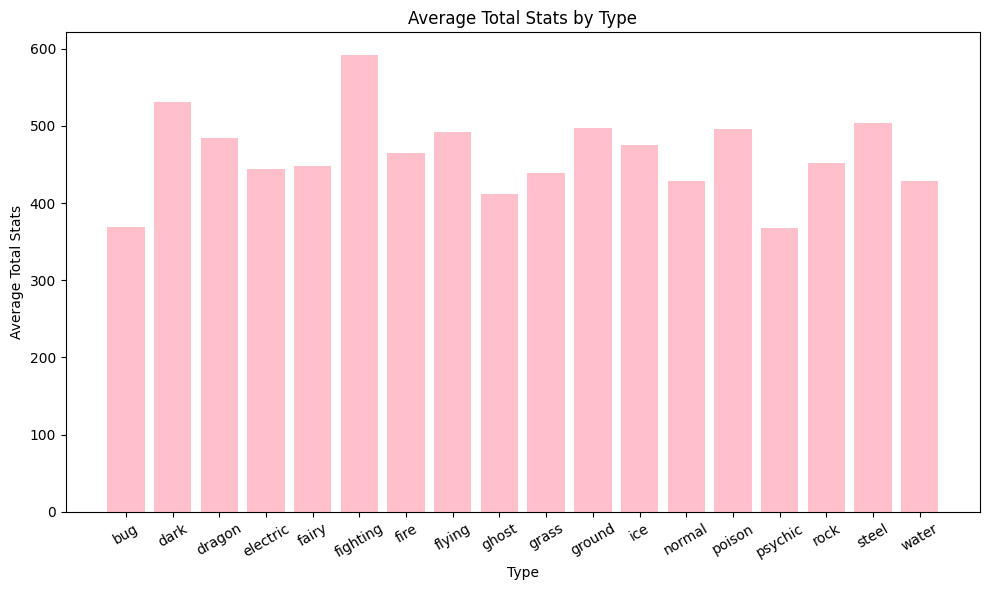

In [145]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type9.index, average_stats_by_type9["Total Stats"], color = 'pink') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='right')
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='right')
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='right')
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='

C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='right')
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='right')
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='right')
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\1534608778.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=30, ha='

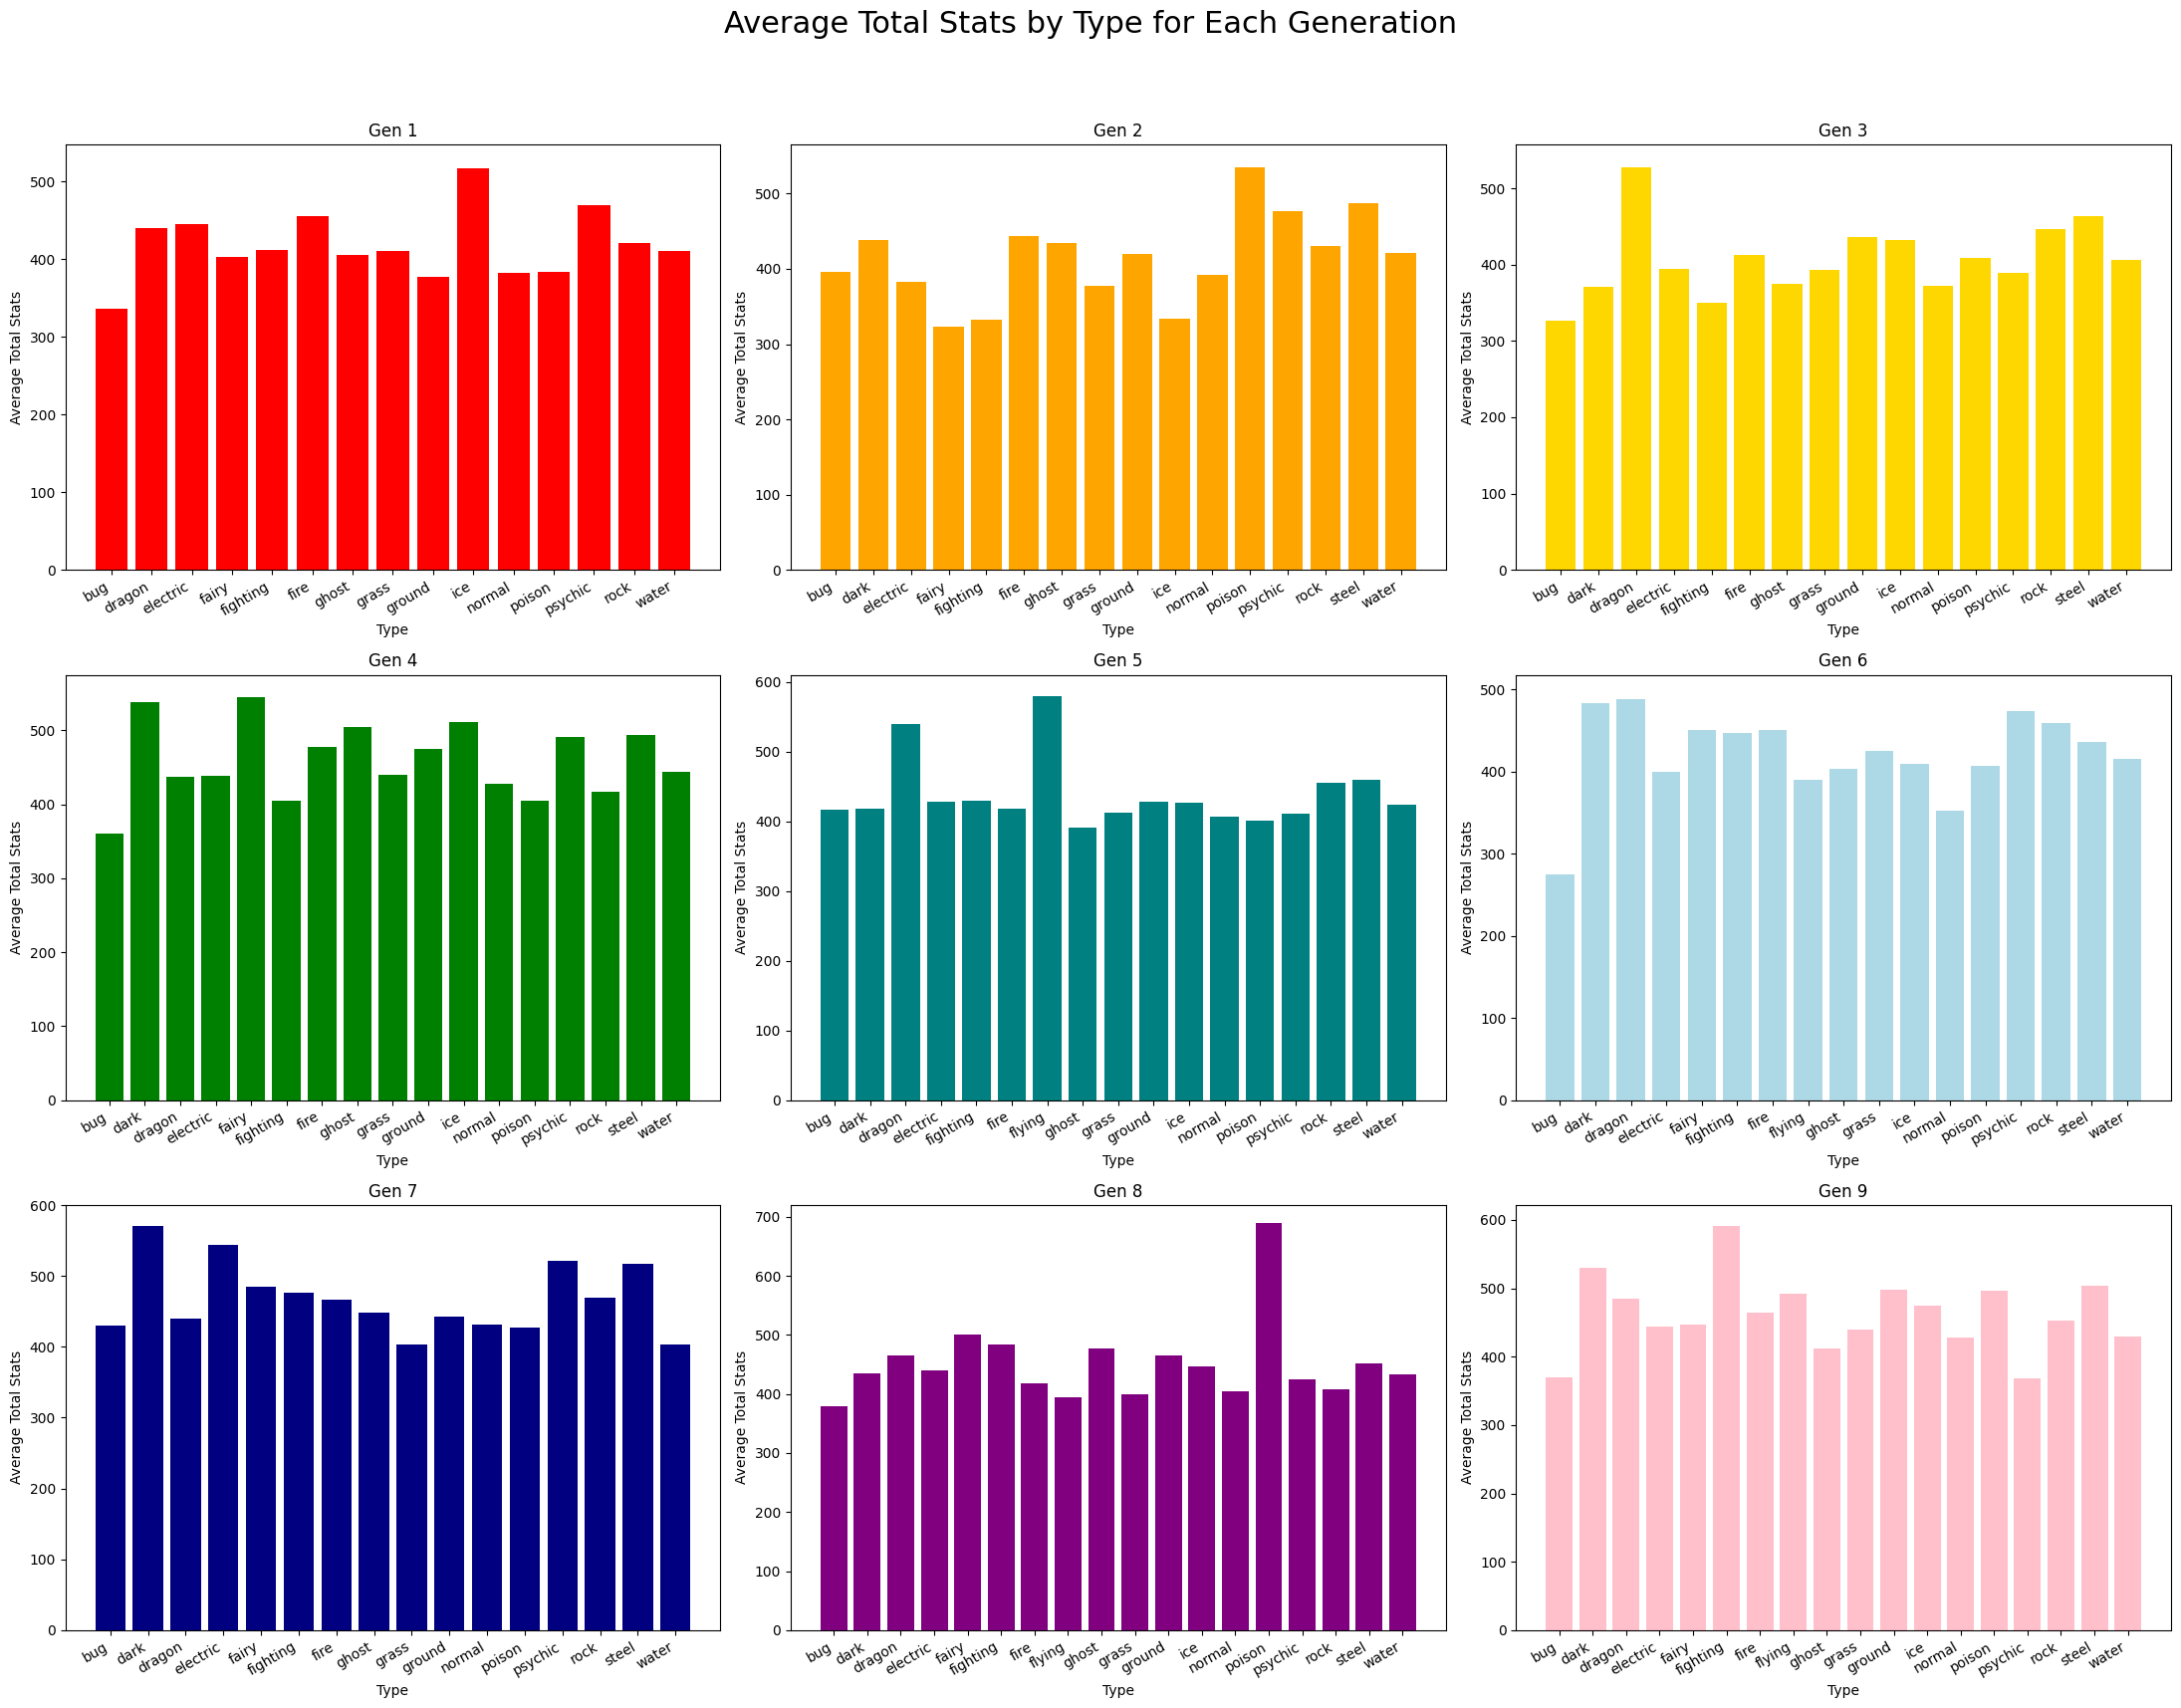

In [147]:
pokemon_data_all = []

for i in range(1,1026):
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()


    pokemon_data_all.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "Abilities" : [ability["ability"]["name"] for ability in data["abilities"]],
        "id" : data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat ["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

    multi_pokemon_df_all = pd.DataFrame(pokemon_data_all)
print(multi_pokemon_df_all.head())

         Name   Type                Abilities  id  HP  Attack  Defense  Speed  \
0   bulbasaur  grass  [overgrow, chlorophyll]   1  45      49       49     45   
1     ivysaur  grass  [overgrow, chlorophyll]   2  60      62       63     60   
2    venusaur  grass  [overgrow, chlorophyll]   3  80      82       83     80   
3  charmander   fire     [blaze, solar-power]   4  39      52       43     65   
4  charmeleon   fire     [blaze, solar-power]   5  58      64       58     80   

   Special Attack  Special Defense  Total Stats  
0              65               65          318  
1              80               80          405  
2             100              100          525  
3              60               50          309  
4              80               65          405  


In [148]:
average_stats_by_type_all = multi_pokemon_df_all.groupby("Type")[["HP", "Attack", "Defense", "Speed", "Special Attack", "Special Defense", "Total Stats"]].mean()


average_stats_by_type_all.shape

average_stats_by_type_all.head()

,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats
Type,,,,,,,
bug,56.493976,67.554217,69.578313,61.265060,56.433735,63.313253,374.638554
dark,75.800000,88.000000,71.622222,75.622222,72.933333,70.755556,454.733333
dragon,79.594595,98.972973,75.216216,80.189189,78.486486,77.702703,490.162162
electric,64.779661,72.966102,62.101695,85.067797,84.830508,66.559322,436.305085
fairy,71.379310,66.827586,70.965517,65.000000,76.103448,85.793103,436.068966


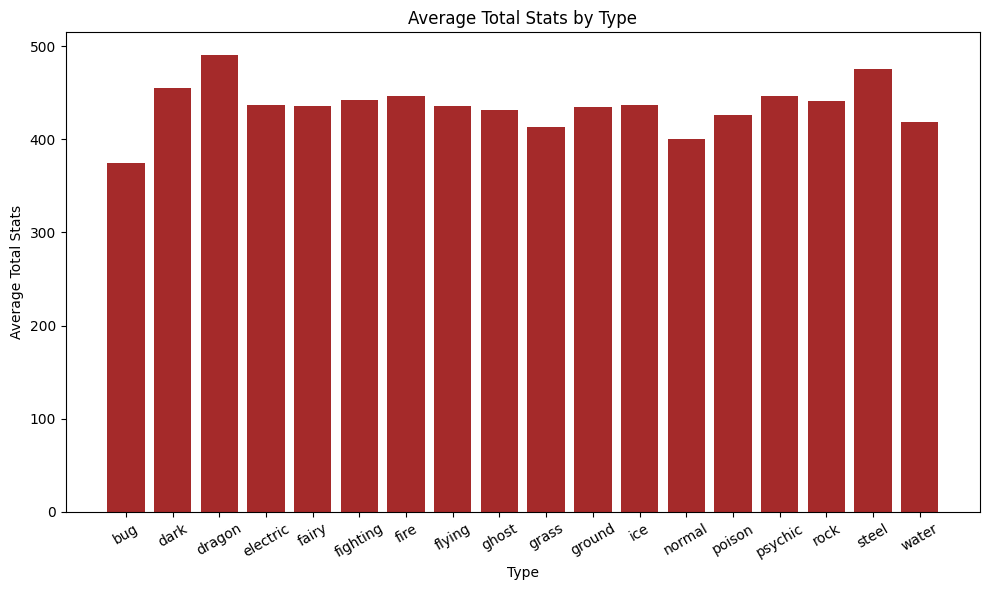

In [149]:
plt.figure(figsize=(10, 6)) 
plt.bar(average_stats_by_type_all.index, average_stats_by_type_all["Total Stats"], color = 'brown') 
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Type")
plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()

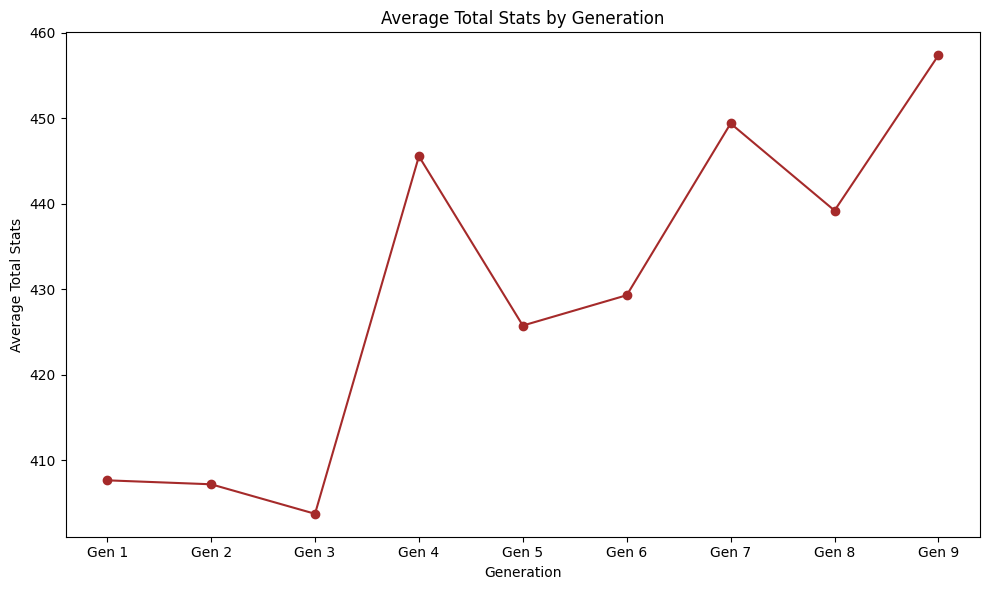

In [150]:
gen_names = ["Gen 1", "Gen 2", "Gen 3", "Gen 4", "Gen 5", "Gen 6", "Gen 7", "Gen 8", "Gen 9"]
gen_averages = [
    multi_pokemon_df["Total Stats"].mean(),
    multi_pokemon_df2["Total Stats"].mean(),
    multi_pokemon_df3["Total Stats"].mean(),
    multi_pokemon_df4["Total Stats"].mean(),
    multi_pokemon_df5["Total Stats"].mean(),
    multi_pokemon_df6["Total Stats"].mean(),
    multi_pokemon_df7["Total Stats"].mean(),
    multi_pokemon_df8["Total Stats"].mean(),
    multi_pokemon_df9["Total Stats"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(gen_names, gen_averages, color='brown', marker='o')
plt.xlabel("Generation")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Generation")
plt.tight_layout()
plt.show()

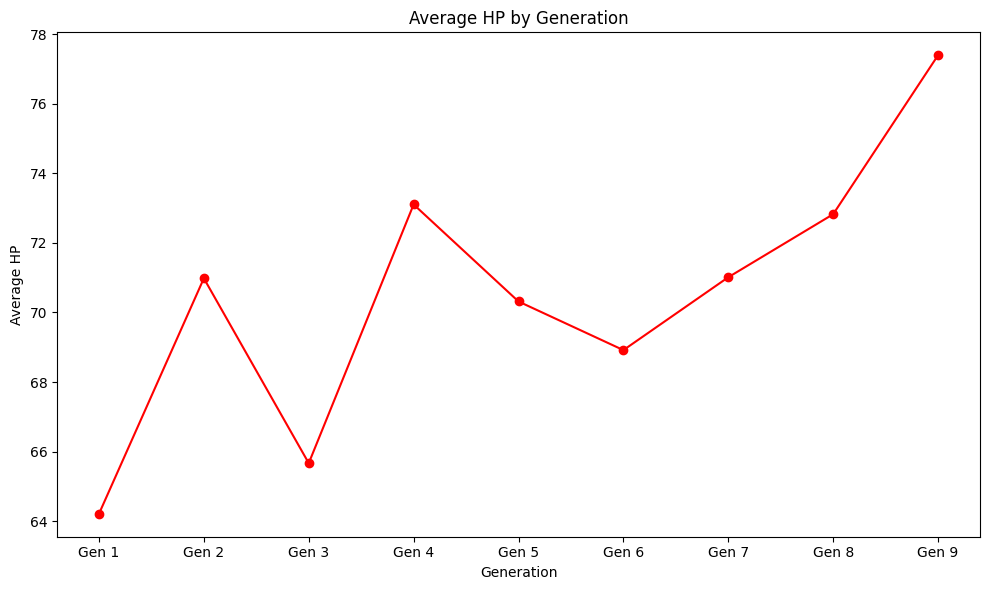

In [151]:
gen_averages_HP = [
    multi_pokemon_df["HP"].mean(),
    multi_pokemon_df2["HP"].mean(),
    multi_pokemon_df3["HP"].mean(),
    multi_pokemon_df4["HP"].mean(),
    multi_pokemon_df5["HP"].mean(),
    multi_pokemon_df6["HP"].mean(),
    multi_pokemon_df7["HP"].mean(),
    multi_pokemon_df8["HP"].mean(),
    multi_pokemon_df9["HP"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(gen_names, gen_averages_HP, color='red', marker='o')
plt.xlabel("Generation")
plt.ylabel("Average HP")
plt.title("Average HP by Generation")
plt.tight_layout()
plt.show()

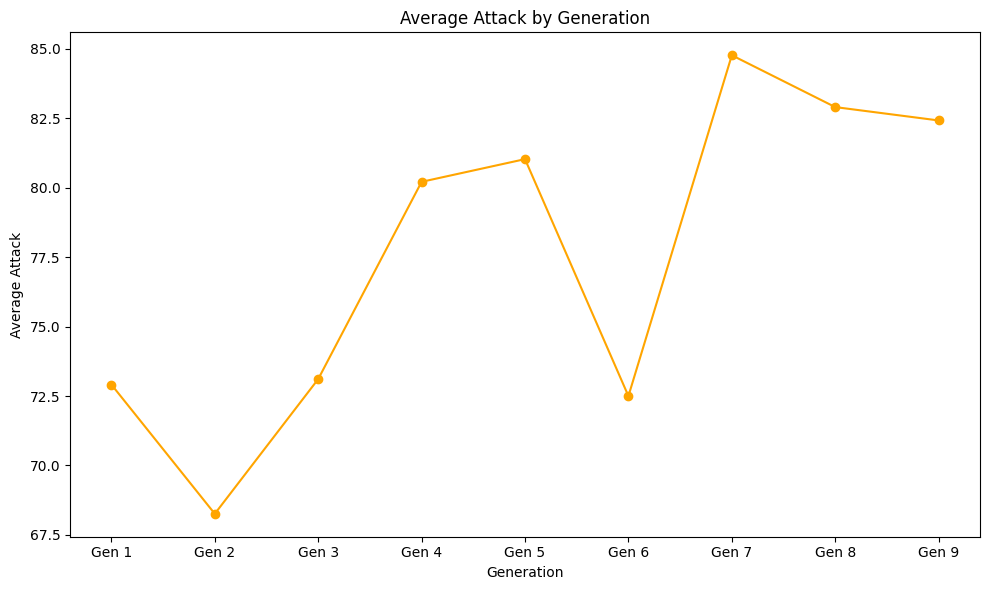

In [152]:
gen_averages_Attack = [
    multi_pokemon_df["Attack"].mean(),
    multi_pokemon_df2["Attack"].mean(),
    multi_pokemon_df3["Attack"].mean(),
    multi_pokemon_df4["Attack"].mean(),
    multi_pokemon_df5["Attack"].mean(),
    multi_pokemon_df6["Attack"].mean(),
    multi_pokemon_df7["Attack"].mean(),
    multi_pokemon_df8["Attack"].mean(),
    multi_pokemon_df9["Attack"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(gen_names, gen_averages_Attack, color='orange', marker='o')
plt.xlabel("Generation")
plt.ylabel("Average Attack")
plt.title("Average Attack by Generation")
plt.tight_layout()
plt.show()

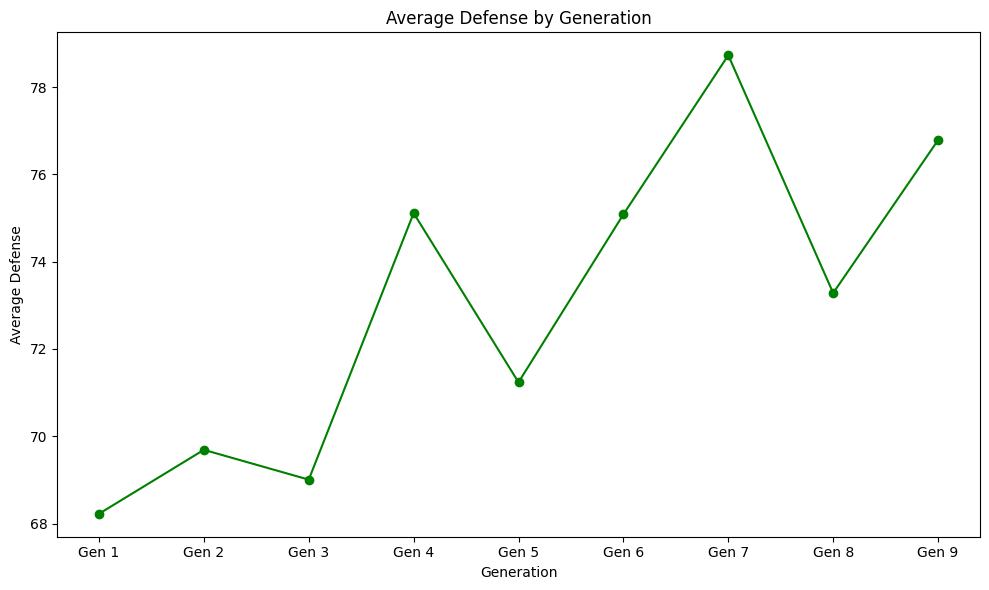

In [153]:
gen_averages_Defense = [
    multi_pokemon_df["Defense"].mean(),
    multi_pokemon_df2["Defense"].mean(),
    multi_pokemon_df3["Defense"].mean(),
    multi_pokemon_df4["Defense"].mean(),
    multi_pokemon_df5["Defense"].mean(),
    multi_pokemon_df6["Defense"].mean(),
    multi_pokemon_df7["Defense"].mean(),
    multi_pokemon_df8["Defense"].mean(),
    multi_pokemon_df9["Defense"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(gen_names, gen_averages_Defense, color='green', marker='o')
plt.xlabel("Generation")
plt.ylabel("Average Defense")
plt.title("Average Defense by Generation")
plt.tight_layout()
plt.show()

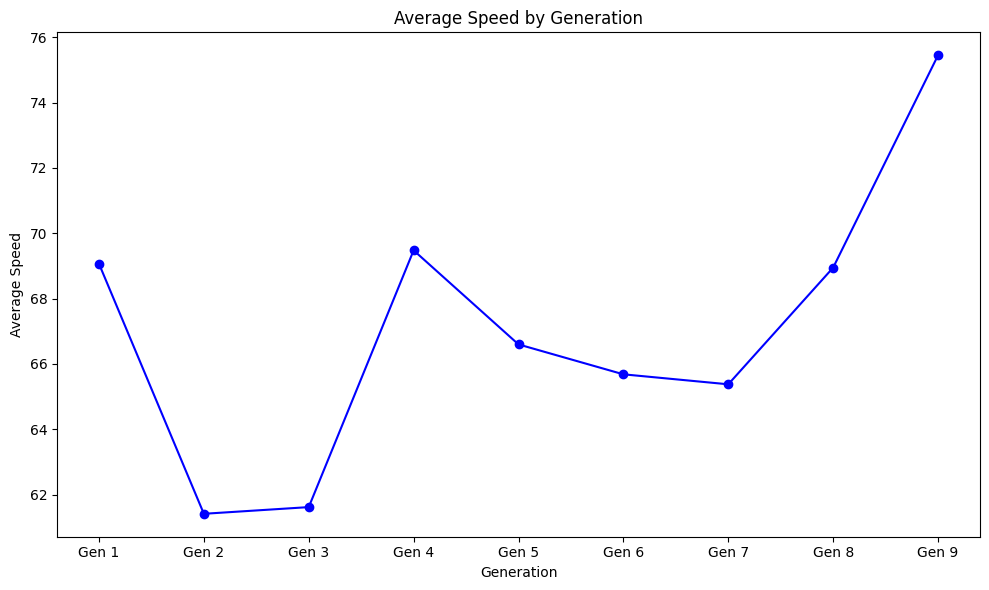

In [154]:
gen_averages_Speed = [
    multi_pokemon_df["Speed"].mean(),
    multi_pokemon_df2["Speed"].mean(),
    multi_pokemon_df3["Speed"].mean(),
    multi_pokemon_df4["Speed"].mean(),
    multi_pokemon_df5["Speed"].mean(),
    multi_pokemon_df6["Speed"].mean(),
    multi_pokemon_df7["Speed"].mean(),
    multi_pokemon_df8["Speed"].mean(),
    multi_pokemon_df9["Speed"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(gen_names, gen_averages_Speed, color='blue', marker='o')
plt.xlabel("Generation")
plt.ylabel("Average Speed")
plt.title("Average Speed by Generation")
plt.tight_layout()
plt.show()

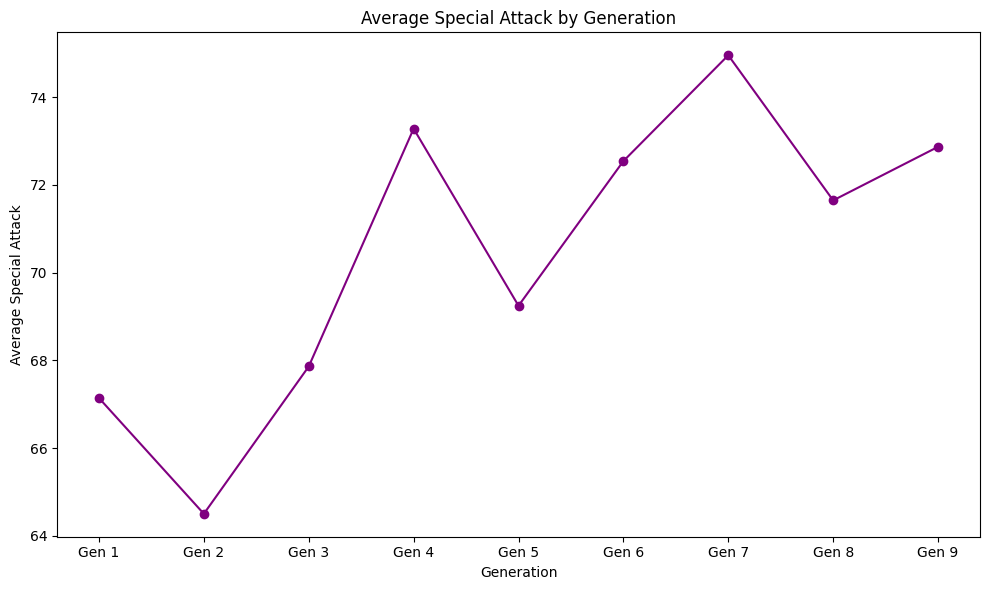

In [155]:
gen_averages_SpecialAttack = [
    multi_pokemon_df["Special Attack"].mean(),
    multi_pokemon_df2["Special Attack"].mean(),
    multi_pokemon_df3["Special Attack"].mean(),
    multi_pokemon_df4["Special Attack"].mean(),
    multi_pokemon_df5["Special Attack"].mean(),
    multi_pokemon_df6["Special Attack"].mean(),
    multi_pokemon_df7["Special Attack"].mean(),
    multi_pokemon_df8["Special Attack"].mean(),
    multi_pokemon_df9["Special Attack"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(gen_names, gen_averages_SpecialAttack, color='purple', marker='o')
plt.xlabel("Generation")
plt.ylabel("Average Special Attack")
plt.title("Average Special Attack by Generation")
plt.tight_layout()
plt.show()

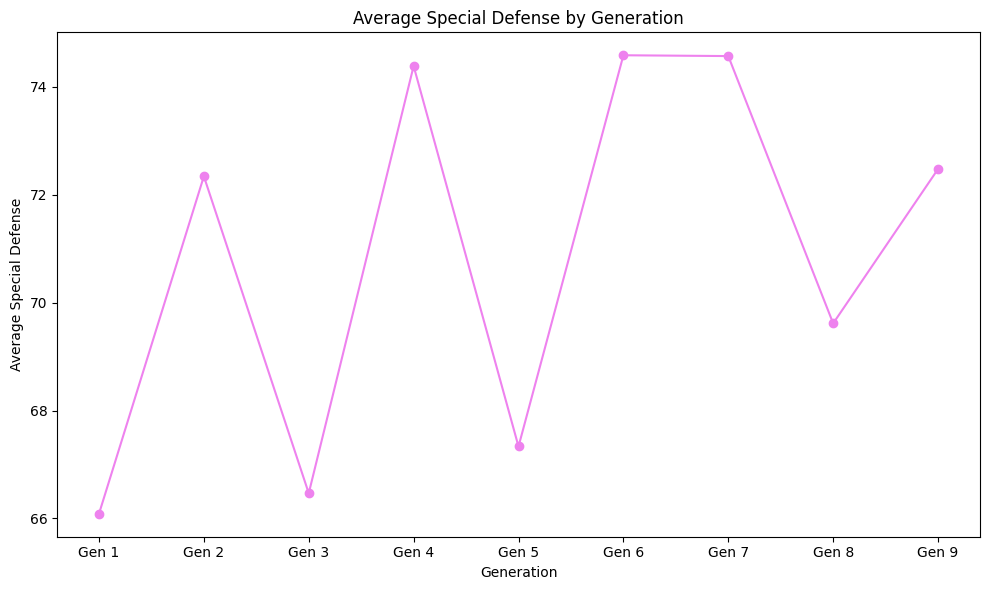

In [156]:
gen_averages_SpecialDefense = [
    multi_pokemon_df["Special Defense"].mean(),
    multi_pokemon_df2["Special Defense"].mean(),
    multi_pokemon_df3["Special Defense"].mean(),
    multi_pokemon_df4["Special Defense"].mean(),
    multi_pokemon_df5["Special Defense"].mean(),
    multi_pokemon_df6["Special Defense"].mean(),
    multi_pokemon_df7["Special Defense"].mean(),
    multi_pokemon_df8["Special Defense"].mean(),
    multi_pokemon_df9["Special Defense"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(gen_names, gen_averages_SpecialDefense, color='violet', marker='o')
plt.xlabel("Generation")
plt.ylabel("Average Special Defense")
plt.title("Average Special Defense by Generation")
plt.tight_layout()
plt.show()

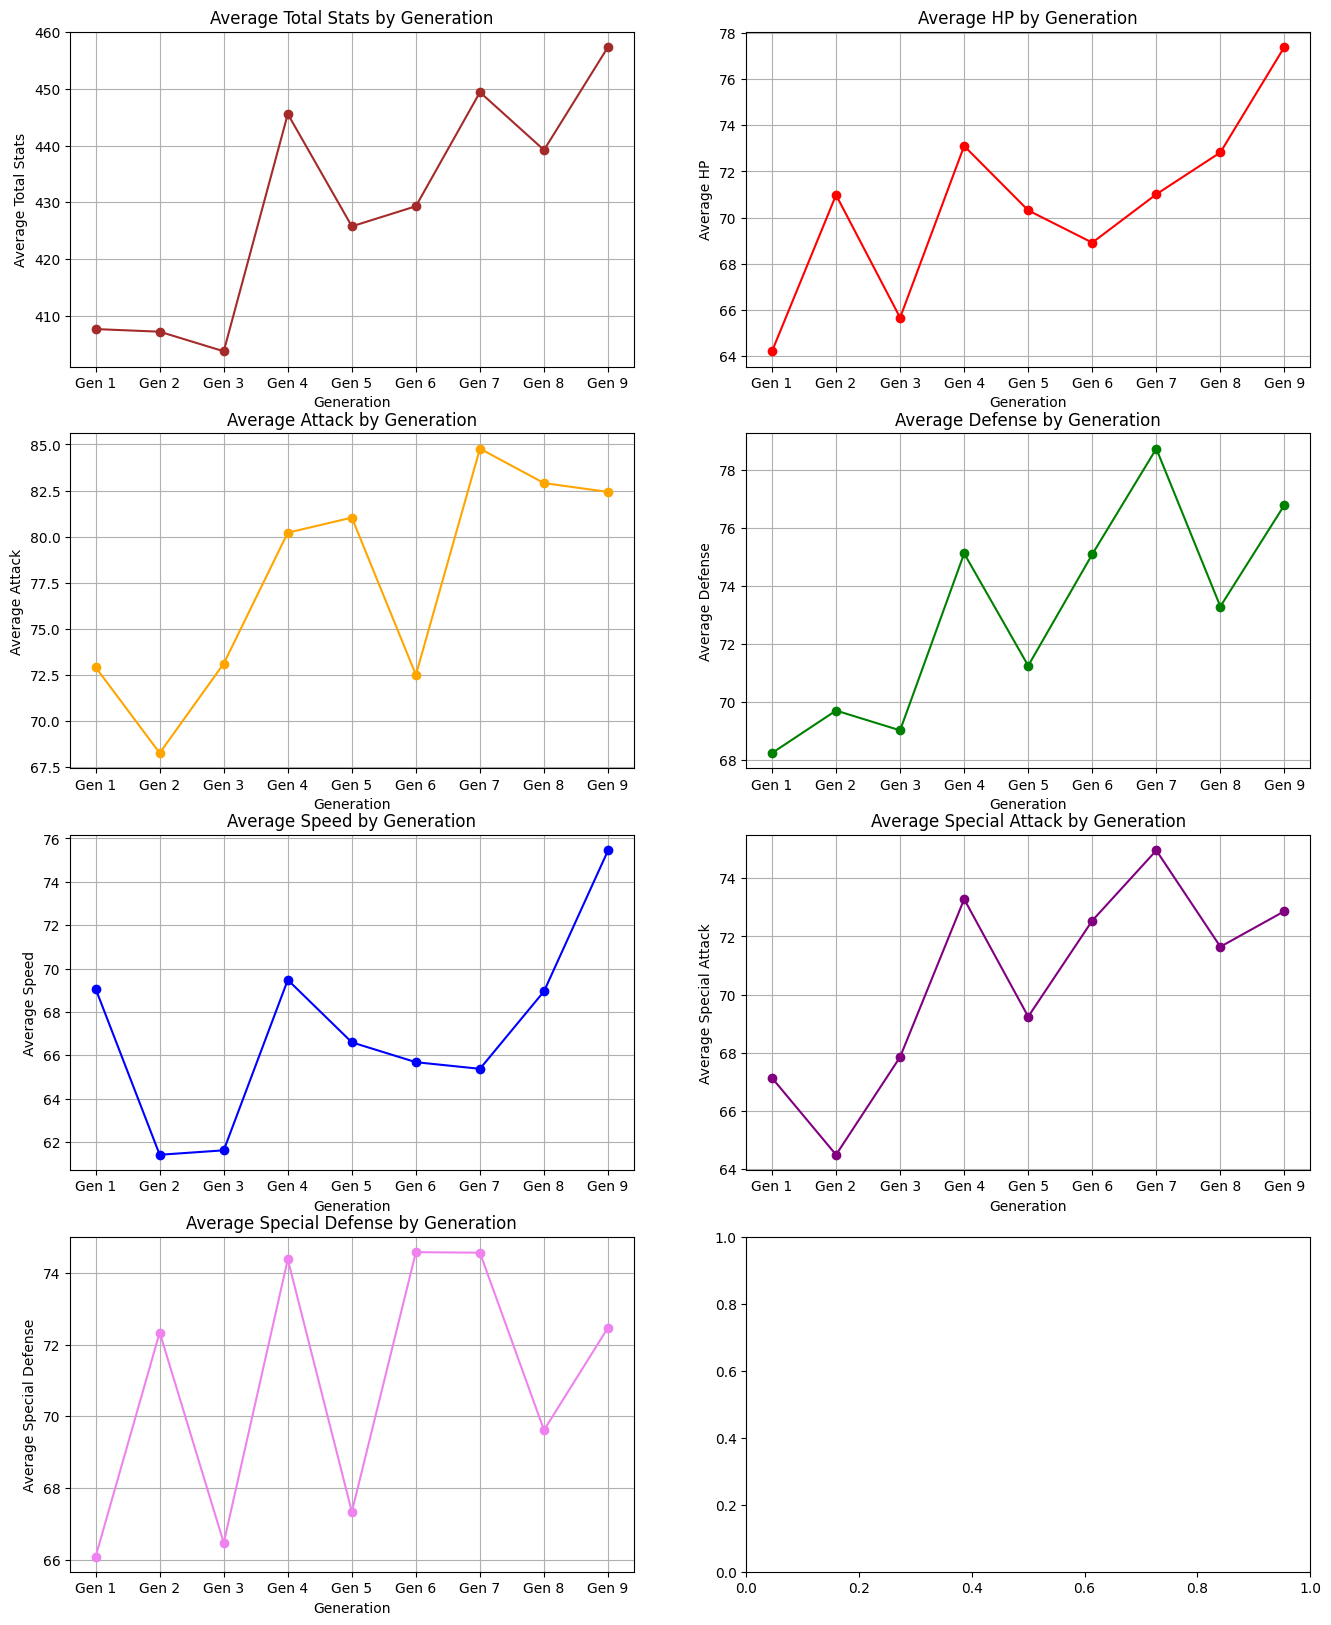

In [160]:
stat_lists = [
    ("Total Stats", [multi_pokemon_df["Total Stats"].mean(), multi_pokemon_df2["Total Stats"].mean(), multi_pokemon_df3["Total Stats"].mean(), multi_pokemon_df4["Total Stats"].mean(), multi_pokemon_df5["Total Stats"].mean(), multi_pokemon_df6["Total Stats"].mean(), multi_pokemon_df7["Total Stats"].mean(), multi_pokemon_df8["Total Stats"].mean(), multi_pokemon_df9["Total Stats"].mean()], 'brown'),
    ("HP", [multi_pokemon_df["HP"].mean(), multi_pokemon_df2["HP"].mean(), multi_pokemon_df3["HP"].mean(), multi_pokemon_df4["HP"].mean(), multi_pokemon_df5["HP"].mean(), multi_pokemon_df6["HP"].mean(), multi_pokemon_df7["HP"].mean(), multi_pokemon_df8["HP"].mean(), multi_pokemon_df9["HP"].mean()], 'red'),
    ("Attack", [multi_pokemon_df["Attack"].mean(), multi_pokemon_df2["Attack"].mean(), multi_pokemon_df3["Attack"].mean(), multi_pokemon_df4["Attack"].mean(), multi_pokemon_df5["Attack"].mean(), multi_pokemon_df6["Attack"].mean(), multi_pokemon_df7["Attack"].mean(), multi_pokemon_df8["Attack"].mean(), multi_pokemon_df9["Attack"].mean()], 'orange'),
    ("Defense", [multi_pokemon_df["Defense"].mean(), multi_pokemon_df2["Defense"].mean(), multi_pokemon_df3["Defense"].mean(), multi_pokemon_df4["Defense"].mean(), multi_pokemon_df5["Defense"].mean(), multi_pokemon_df6["Defense"].mean(), multi_pokemon_df7["Defense"].mean(), multi_pokemon_df8["Defense"].mean(), multi_pokemon_df9["Defense"].mean()], 'green'),
    ("Speed", [multi_pokemon_df["Speed"].mean(), multi_pokemon_df2["Speed"].mean(), multi_pokemon_df3["Speed"].mean(), multi_pokemon_df4["Speed"].mean(), multi_pokemon_df5["Speed"].mean(), multi_pokemon_df6["Speed"].mean(), multi_pokemon_df7["Speed"].mean(), multi_pokemon_df8["Speed"].mean(), multi_pokemon_df9["Speed"].mean()], 'blue'),
    ("Special Attack", [multi_pokemon_df["Special Attack"].mean(), multi_pokemon_df2["Special Attack"].mean(), multi_pokemon_df3["Special Attack"].mean(), multi_pokemon_df4["Special Attack"].mean(), multi_pokemon_df5["Special Attack"].mean(), multi_pokemon_df6["Special Attack"].mean(), multi_pokemon_df7["Special Attack"].mean(), multi_pokemon_df8["Special Attack"].mean(), multi_pokemon_df9["Special Attack"].mean()], 'purple'),
    ("Special Defense", [multi_pokemon_df["Special Defense"].mean(), multi_pokemon_df2["Special Defense"].mean(), multi_pokemon_df3["Special Defense"].mean(), multi_pokemon_df4["Special Defense"].mean(), multi_pokemon_df5["Special Defense"].mean(), multi_pokemon_df6["Special Defense"].mean(), multi_pokemon_df7["Special Defense"].mean(), multi_pokemon_df8["Special Defense"].mean(), multi_pokemon_df9["Special Defense"].mean()], 'violet')
]

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, (stat_name, stat_values, color) in enumerate(stat_lists):
    axes[i].plot(gen_names, stat_values, color=color, marker='o')
    axes[i].set_title(f"Average {stat_name} by Generation")
    axes[i].set_xlabel("Generation")
    axes[i].set_ylabel(f"Average {stat_name}")
    axes[i].grid(True)

In [46]:
from scipy import stats

gen1_stats = multi_pokemon_df["Total Stats"]
gen_all_stats = multi_pokemon_df_all["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen1_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.067810806133753
p-value: 0.03887647579381781


In [47]:
gen2_stats = multi_pokemon_df2["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen2_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.7361786667063497
p-value: 0.08280650505131222


In [49]:
gen3_stats = multi_pokemon_df3["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen3_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.313913419943714
p-value: 0.020846850972218407


In [50]:
gen4_stats = multi_pokemon_df4["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen4_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.5550282011006404
p-value: 0.12021936459500224


In [51]:
gen5_stats = multi_pokemon_df5["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen5_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.20150673391461818
p-value: 0.8403371243032907


In [52]:
gen6_stats = multi_pokemon_df6["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen6_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.11780441869562171
p-value: 0.9062442330816304


In [53]:
gen7_stats = multi_pokemon_df7["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen7_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.7262143793245976
p-value: 0.08458686303614948


In [54]:
gen8_stats = multi_pokemon_df8["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen8_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.9555040204618452
p-value: 0.3395292438091897


In [55]:
gen9_stats = multi_pokemon_df9["Total Stats"]

t_stat, p_value = stats.ttest_ind(gen9_stats, gen_all_stats)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.7203282160692392
p-value: 0.0066206390976074215


In [ ]:
df = pd.read_excel(r'C:\Users\GeXua\pokemonsale.xlsx')

df.head()

# Multiply the first row 'Units Sales' and 'Gross' by 2/3 and create a new DataFrame, because the RED/GREEN/BLUE are three different games
#but other gen are all two games

new_df = df.copy()
new_df.iloc[0, df.columns.get_loc('Units Sales')] *= (2/3)

new_df.head()

,Title,Year,Generation,Units Sales,Total Sales
0,Pokémon Red / Green / Blue,1996,1,20920000,46020000
1,Pokémon Gold / Silver,1999,2,23730000,30390000
2,Pokémon Ruby / Sapphire,2002,3,16220000,16220000
3,Pokémon Diamond / Pearl,2006,4,17670000,37990000
4,Pokémon Black / White,2010,5,15640000,23890000


In [26]:
df['Diff'] = [0.03887647579381781, 0.08280650505131222, 0.020846850972218407, 0.12021936459500224, 0.8403371243032907, 0.9062442330816304, 0.08458686303614948, 0.3395292438091897, 0.0066206390976074215]
df.head()
# Add a new column 'Diff_judge': 0 if diff < 0.05, 1 if diff >= 0.05
df['Diff_a'] = (df['Diff'] >= 0.05).astype(int)
df.head()

,Title,Year,Generation,Units Sales,Total Sales,Diff,Diff_judge,Diff_a
0,Pokémon Red / Green / Blue,1996,1,31380000,46020000,0.038876,0,1
1,Pokémon Gold / Silver,1999,2,23730000,30390000,0.082807,1,0
2,Pokémon Ruby / Sapphire,2002,3,16220000,16220000,0.020847,0,1
3,Pokémon Diamond / Pearl,2006,4,17670000,37990000,0.120219,1,0
4,Pokémon Black / White,2010,5,15640000,23890000,0.840337,1,0


In [27]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Diff_a'], df['Units Sales'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 9.0
p-value: 0.34229595583459105


In [28]:
df_no_gen1 = df.iloc[1:].copy()

contingency_table_no_gen1 = pd.crosstab(df_no_gen1['Diff_a'], df_no_gen1['Units Sales'])

chi2_no_gen1, p_no_gen1, dof_no_gen1, expected_no_gen1 = chi2_contingency(contingency_table_no_gen1)

print("Chi-square statistic (without Gen 1):", chi2_no_gen1)
print("p-value (without Gen 1):", p_no_gen1)

Chi-square statistic (without Gen 1): 8.0
p-value (without Gen 1): 0.3325939025993081


In [25]:
contingency_table = pd.crosstab(df['Diff_a'], df['Total Sales'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 9.0
p-value: 0.34229595583459105


In [ ]:
#pick the starter pokemon of each generation
pokemon_data_choose = []

ranges = [(1, 10), (152, 161), (252, 261), (387, 396), (495, 504), (650, 659), (722, 731), (810, 819), (906, 915)]
ids = [i for start, end in ranges for i in range(start, end)]

for i in ids:
    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    response = requests.get(url)
    data = response.json()
    pokemon_data_choose.append({
        "Name": data["name"],
        "Type": data["types"][0]["type"]["name"],
        "id": data['id'],
        "HP": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "hp"),
        "Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "attack"),
        "Defense": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "defense"),
        "Speed": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "speed"),
        "Special Attack": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "special-attack"),
        "Special Defense": next(stat["base_stat"] for stat in data["stats"] if stat["stat"]["name"] == "special-defense"),
        "Total Stats": sum(stat["base_stat"] for stat in data["stats"])
    })

choose_pokemon_df = pd.DataFrame(pokemon_data_choose)
choose_pokemon_df['Generation'] = (choose_pokemon_df.index // 9) + 1
# Add a 'level' column to choose_pokemon_df:
choose_pokemon_df['level'] = (choose_pokemon_df.index % 3)+ 1
choose_pokemon_df.head()

,Name,Type,id,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats,Generation,level
0,bulbasaur,grass,1,45,49,49,45,65,65,318,1,1
1,ivysaur,grass,2,60,62,63,60,80,80,405,1,2
2,venusaur,grass,3,80,82,83,80,100,100,525,1,3
3,charmander,fire,4,39,52,43,65,60,50,309,1,1
4,charmeleon,fire,5,58,64,58,80,80,65,405,1,2


In [95]:
# Download choose_pokemon_df as Excel
choose_pokemon_df.to_excel('choose_pokemon.xlsx', index=False)

In [121]:
multi_pokemon_df.to_excel('gen1pokemon.xlsx', index=False)

In [96]:
# Divide choose_pokemon_df into three tables according to type: grass, fire, water
df_grass = choose_pokemon_df[choose_pokemon_df['Type'] == 'grass']
df_fire = choose_pokemon_df[choose_pokemon_df['Type'] == 'fire']
df_water = choose_pokemon_df[choose_pokemon_df['Type'] == 'water']

df_grass.shape, df_fire.shape, df_water.shape

df_grass.head()

,Name,Type,id,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats,Generation,level
0,bulbasaur,grass,1,45,49,49,45,65,65,318,1,1
1,ivysaur,grass,2,60,62,63,60,80,80,405,1,2
2,venusaur,grass,3,80,82,83,80,100,100,525,1,3
9,chikorita,grass,152,45,49,65,45,49,65,318,2,1
10,bayleef,grass,153,60,62,80,60,63,80,405,2,2


In [97]:
df_fire.head()

,Name,Type,id,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats,Generation,level
3,charmander,fire,4,39,52,43,65,60,50,309,1,1
4,charmeleon,fire,5,58,64,58,80,80,65,405,1,2
5,charizard,fire,6,78,84,78,100,109,85,534,1,3
12,cyndaquil,fire,155,39,52,43,65,60,50,309,2,1
13,quilava,fire,156,58,64,58,80,80,65,405,2,2


In [98]:
df_water.head()

,Name,Type,id,HP,Attack,Defense,Speed,Special Attack,Special Defense,Total Stats,Generation,level
6,squirtle,water,7,44,48,65,43,50,64,314,1,1
7,wartortle,water,8,59,63,80,58,65,80,405,1,2
8,blastoise,water,9,79,83,100,78,85,105,530,1,3
15,totodile,water,158,50,65,64,43,44,48,314,2,1
16,croconaw,water,159,65,80,80,58,59,63,405,2,2


C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\147180339.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\147180339.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Average Total Stats')

C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\147180339.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\GeXua\AppData\Local\Temp\ipykernel_21840\147180339.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Average Total Stats')

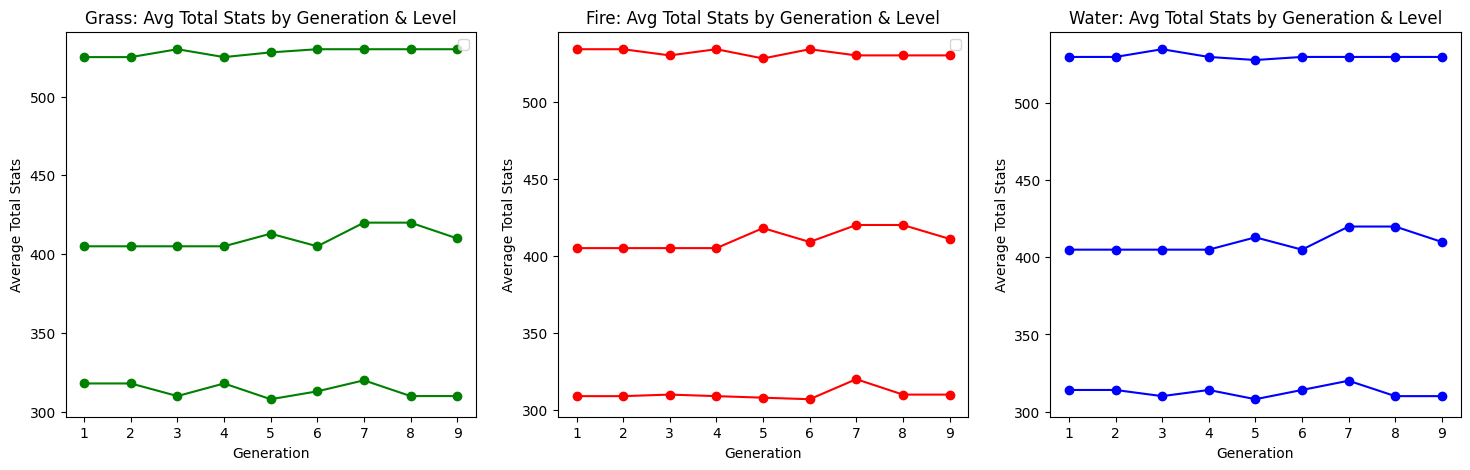

In [99]:
# Draw three plot graphs for grass, fire, water by generation and level (each plot has three lines for level 1, 2, 3)

plt.figure(figsize=(18, 5))

# Grass
plt.subplot(1, 3, 1)
for lvl in [1, 2, 3]:
    grass_lvl = df_grass[df_grass['level'] == lvl].groupby('Generation')['Total Stats'].mean()
    plt.plot(grass_lvl.index, grass_lvl.values, marker='o', color='green')
plt.title('Grass: Avg Total Stats by Generation & Level')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')
plt.legend()

# Fire
plt.subplot(1, 3, 2)
for lvl in [1, 2, 3]:
    fire_lvl = df_fire[df_fire['level'] == lvl].groupby('Generation')['Total Stats'].mean()
    plt.plot(fire_lvl.index, fire_lvl.values, marker='o', color='red')
plt.title('Fire: Avg Total Stats by Generation & Level')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')
plt.legend()

# Water
plt.subplot(1, 3, 3)
for lvl in [1, 2, 3]:
    water_lvl = df_water[df_water['level'] == lvl].groupby('Generation')['Total Stats'].mean()
    plt.plot(water_lvl.index, water_lvl.values, marker='o', color='blue')
plt.title('Water: Avg Total Stats by Generation & Level')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')

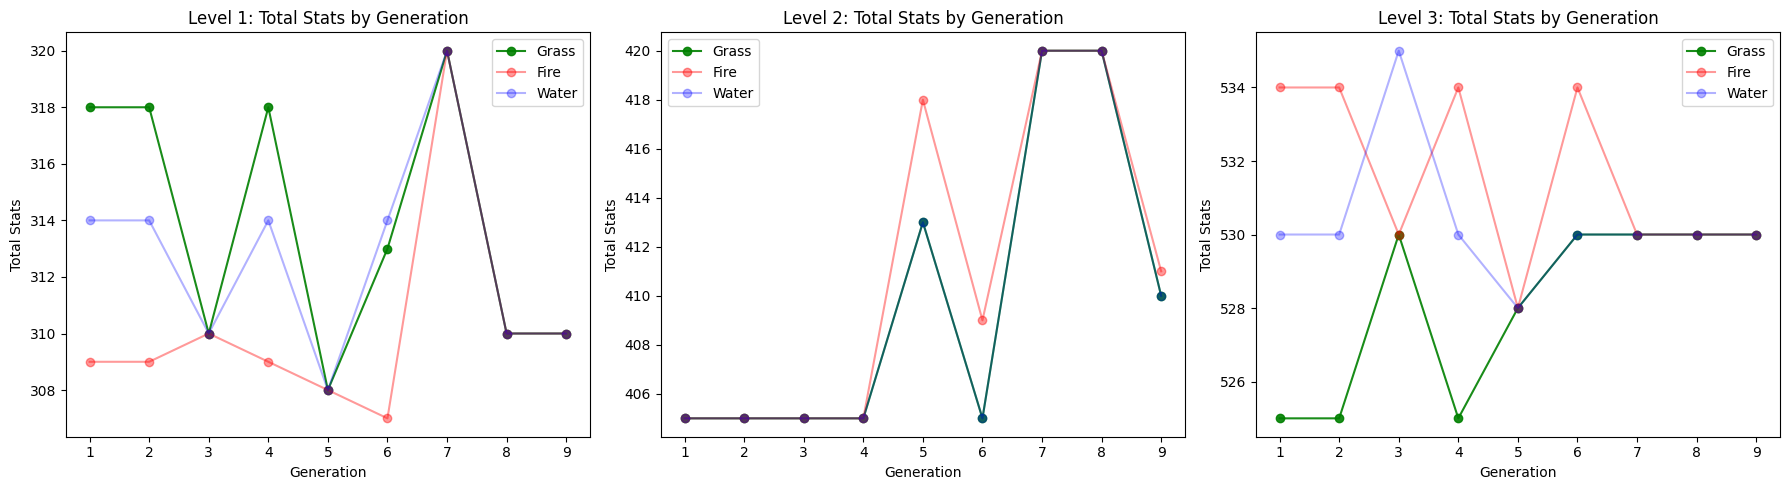

In [116]:
# Draw three plot graphs for each level by generation

plt.figure(figsize=(18, 5))

for idx, lvl in enumerate([1, 2, 3], start=1):
    plt.subplot(1, 3, idx)
    grass_lvl = df_grass[df_grass['level'] == lvl].groupby('Generation')['Total Stats'].mean()
    fire_lvl = df_fire[df_fire['level'] == lvl].groupby('Generation')['Total Stats'].mean()
    water_lvl = df_water[df_water['level'] == lvl].groupby('Generation')['Total Stats'].mean()
    plt.plot(grass_lvl.index, grass_lvl.values, marker='o', color='green', label='Grass', alpha=0.9)
    plt.plot(fire_lvl.index, fire_lvl.values, marker='o', color='red', label='Fire', alpha=0.4)
    plt.plot(water_lvl.index, water_lvl.values, marker='o', color='blue', label='Water', alpha=0.3)
    plt.title(f'Level {lvl}: Total Stats by Generation')
    plt.xlabel('Generation')
    plt.ylabel('Total Stats')
    plt.legend()

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Total Stats')

Text(0, 0.5, 'Average Total Stats')

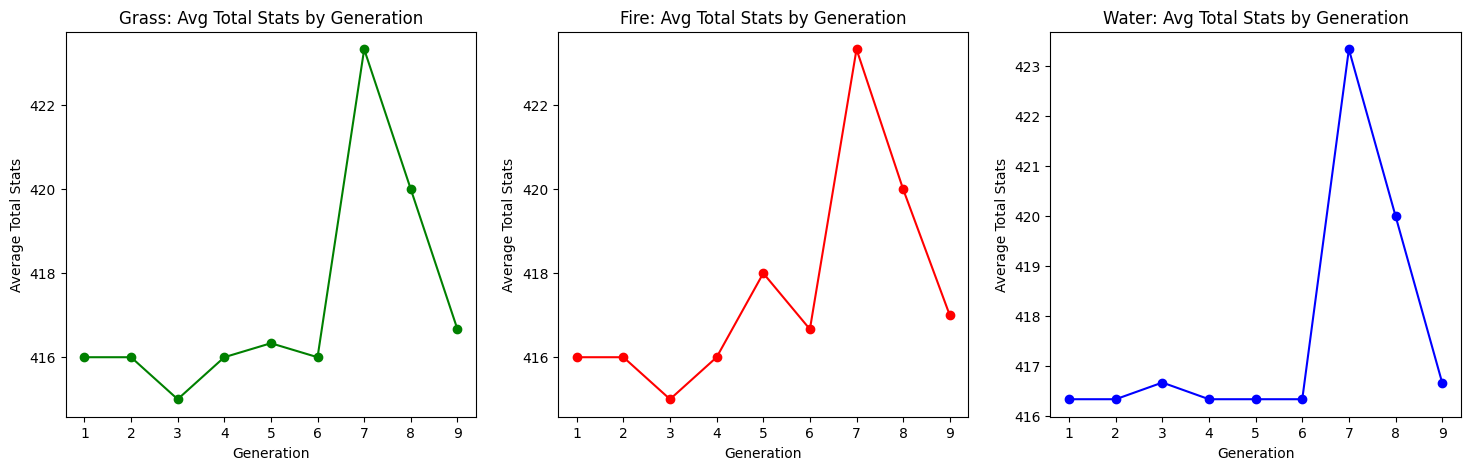

In [100]:
# Draw three plot graphs for grass, fire, water by generation

plt.figure(figsize=(18, 5))

# Grass
plt.subplot(1, 3, 1)
grass_gen = df_grass.groupby('Generation')['Total Stats'].mean()
plt.plot(grass_gen.index, grass_gen.values, marker='o', color='green')
plt.title('Grass: Avg Total Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')

# Fire
plt.subplot(1, 3, 2)
fire_gen = df_fire.groupby('Generation')['Total Stats'].mean()
plt.plot(fire_gen.index, fire_gen.values, marker='o', color='red')
plt.title('Fire: Avg Total Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')

# Water
plt.subplot(1, 3, 3)
water_gen = df_water.groupby('Generation')['Total Stats'].mean()
plt.plot(water_gen.index, water_gen.values, marker='o', color='blue')
plt.title('Water: Avg Total Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')

Text(0, 0.5, 'Average Total Stats')

Text(0, 0.5, 'Average Total Stats')

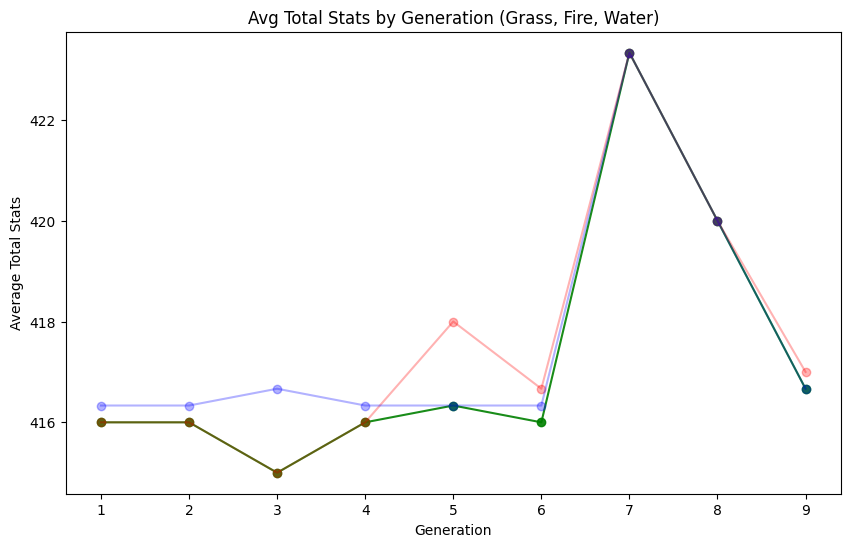

In [109]:
# Draw one plot graph for grass, fire, water by generation

plt.figure(figsize=(10, 6))

grass_gen = df_grass.groupby('Generation')['Total Stats'].mean()
fire_gen = df_fire.groupby('Generation')['Total Stats'].mean()
water_gen = df_water.groupby('Generation')['Total Stats'].mean()

plt.plot(grass_gen.index, grass_gen.values, marker='o', color='green', label='Grass',alpha=0.9)
plt.plot(fire_gen.index, fire_gen.values, marker='o', color='red', label='Fire',alpha=0.3)
plt.plot(water_gen.index, water_gen.values, marker='o', color='blue', label='Water',alpha=0.3)

plt.title('Avg Total Stats by Generation (Grass, Fire, Water)')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')